## **E - COMMERCE CUSTOMER SEGMENTATION PREDICTION**

#### This project uses Amazon customer ( USA ) purchase data to identify and predict customer segments based on spending, purchase frequency, and recent purchase activity.

## **DATA DESCRIPTION**



- **order_id**: A unique number given to each order.
- **order_date**: The date when the order was made.
- **status**: Shows if the order is completed, canceled, or still pending.
- **item_id**: A unique number for each product in the order.
- **sku**: SKU ( stock keeping unit ) a code used to keep track of the product in the store.
- **qty_ordered**: The number of items bought in the order.
- **price**: The cost of each item.
- **value**: The total cost of the order before any discounts.
- **discount_amount**: The money taken off from  the original price.
- **total**: The final amount paid after discounts.
- **category**: The type of product, like clothing, electronics, etc.
- **payment_method**: How the order was paid, example credit card.
- **bi_st**: This indicates the payment or financial status
- **cust_id**: A unique number for each customer
- **year**: The year the order was made
- **month**: The month the order was made
- **ref_num**: A number that links to another order or transaction.
- **Name Prefix**: A title like Mr., Ms., or Dr
- **First Name**: The customer’s first name
- **Middle Initial**: The first letter of the customer’s middle name.
- **Last Name**: The customer’s last name
- **Gender**: The customer’s gender
- **age**: The customer’s age.
- **full_name**: The customer’s full name.
- **E Mail**: The customer’s email address.
- **Sign in date**: The date the customer first signed up.
- **Phone No.**: The customer’s phone number.
- **Place Name**: The area or neighborhood where the customer lives.
- **County**: The district or county of the customer’s location.
- **City**: The city where the customer lives.
- **State**: The state or region of the customer’s address.
- **Zip**: The postal code for the customer’s address.
- **Region**: A larger area, like a group of nearby states.
- **User Name**: The customer’s account name or ID.
- **Discount_Percent**: The discount rate applied to the order.

## **IMPORTS**

In [ ]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


## **LOADING DATA**

In [ ]:
# Loading data

data = pd.read_csv("/content/Amazon Sales FY2020-21.csv")

<ipython-input-9-fd7d0d5de220>:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/Amazon Sales FY2020-21.csv")


In [ ]:
data.head()

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,...,Sign in date,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent
0,100354678,01/10/2020,received,574772,oasis_Oasis-064-36,21,89.9,1798.0,0.0,1798.0,...,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
1,100354678,01/10/2020,received,574774,Fantastic_FT-48,11,19.0,190.0,0.0,190.0,...,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
2,100354680,01/10/2020,complete,574777,mdeal_DMC-610-8,9,149.9,1199.2,0.0,1199.2,...,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
3,100354680,01/10/2020,complete,574779,oasis_Oasis-061-36,9,79.9,639.2,0.0,639.2,...,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
4,100367357,13/11/2020,received,595185,MEFNAR59C38B6CA08CD,2,99.9,99.9,0.0,99.9,...,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0


## **DISPLAYING RECORDS INFORMATION**

In [ ]:
# Displaying features & records details

print("\n Feature Names : ", data.columns )
print("\n Number of Features : ", len(data.columns) )
print("\n Number of records : ", len(data) )


 Feature Names :  Index(['order_id', 'order_date', 'status', 'item_id', 'sku', 'qty_ordered',
       'price', 'value', 'discount_amount', 'total', 'category',
       'payment_method', 'bi_st', 'cust_id', 'year', 'month', 'ref_num',
       'Name Prefix', 'First Name', 'Middle Initial', 'Last Name', 'Gender',
       'age', 'full_name', 'E Mail', 'Sign in date', 'Phone No. ',
       'Place Name', 'County', 'City', 'State', 'Zip', 'Region', 'User Name',
       'Discount_Percent'],
      dtype='object')

 Number of Features :  35

 Number of records :  286392


In [ ]:
# Checking features unique values count

data.nunique()

# From this, we know that the number of unique values that makes sense is less than 20

,0
order_id,201716
order_date,365
status,13
item_id,286392
sku,47932
qty_ordered,72
price,7561
value,10607
discount_amount,13732
total,23755


In [ ]:
# Viewing feature's unique values

count = 0
for columns in data.columns:
  if len(data[columns].unique()) < 20:
    count += 1

    print("\n The total unique values in  : ",columns,len(data[columns].unique()) )
    print("\n",data[columns].unique())


 The total unique values in  :  status 13

 ['received' 'complete' 'order_refunded' 'canceled' 'refund' 'cod' 'paid'
 'processing' 'closed' 'pending' 'pending_paypal' 'payment_review'
 'holded']

 The total unique values in  :  category 15

 ["Men's Fashion" 'Mobiles & Tablets' 'Computing' 'Appliances'
 'Home & Living' "Women's Fashion" 'Health & Sports' 'Beauty & Grooming'
 'Superstore' 'Others' 'Entertainment' 'Soghaat' 'Kids & Baby' 'Books'
 'School & Education']

 The total unique values in  :  payment_method 13

 ['cod' 'Payaxis' 'Easypay' 'jazzwallet' 'Easypay_MA' 'jazzvoucher'
 'easypay_voucher' 'customercredit' 'bankalfalah' 'apg' 'mcblite'
 'cashatdoorstep' 'financesettlement']

 The total unique values in  :  bi_st 3

 ['Valid' 'Net' 'Gross']

 The total unique values in  :  year 2

 [2020 2021]

 The total unique values in  :  month 12

 ['Oct-20' 'Nov-20' 'Dec-20' 'Feb-21' 'Jun-21' 'Sep-21' 'Apr-21' 'Jul-21'
 'Aug-21' 'Mar-21' 'May-21' 'Jan-21']

 The total unique values i

In [ ]:
# Checking null values

data.isnull().sum()

,0
order_id,0
order_date,0
status,0
item_id,0
sku,0
qty_ordered,0
price,0
value,0
discount_amount,0
total,0


## **DATA PRE-PROCESSING**

### **CLEANING**

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
item_id,286392.0,741664.902131,95746.031827,574769.0,659684.50,742309.00,826124.25000,905208.00
qty_ordered,286392.0,3.011296,4.573837,1.0,2.00,2.00,3.00000,501.00
price,286392.0,851.385253,1741.750751,0.0,49.90,119.00,950.00000,101262.59
value,286392.0,885.879934,2073.252179,0.0,49.90,158.97,910.00000,101262.59
discount_amount,286392.0,70.039427,256.880870,0.0,0.00,0.00,18.38305,30213.15
total,286392.0,815.840507,1983.580302,0.0,49.90,149.80,800.00000,101262.59
cust_id,286392.0,70048.019054,30243.856395,4.0,56519.00,74225.50,92357.00000,115326.00
year,286392.0,2020.618778,0.485688,2020.0,2020.00,2021.00,2021.00000,2021.00
ref_num,286392.0,560853.663395,255828.418398,111127.0,341265.00,564857.00,781086.00000,999981.00
age,286392.0,46.489033,16.673288,18.0,32.00,47.00,61.00000,75.00


REMOVING OUTLIERS IN "PRICE"

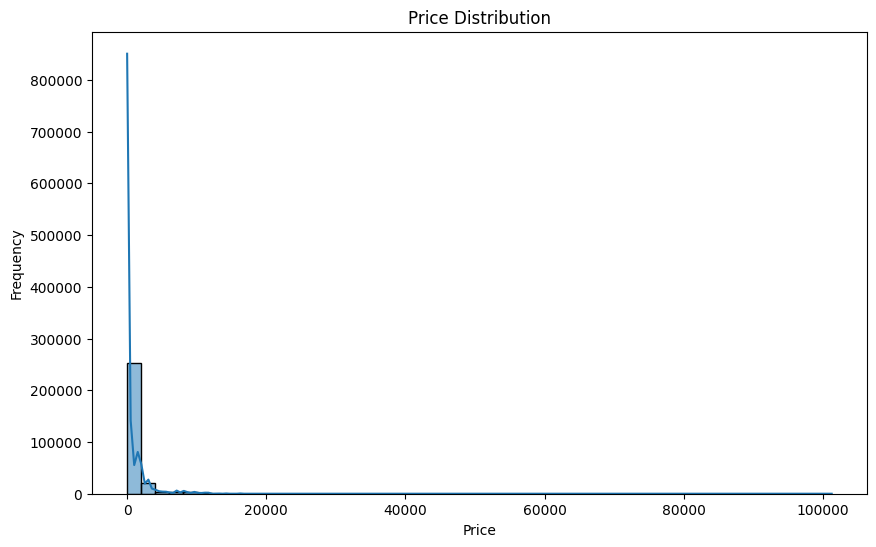

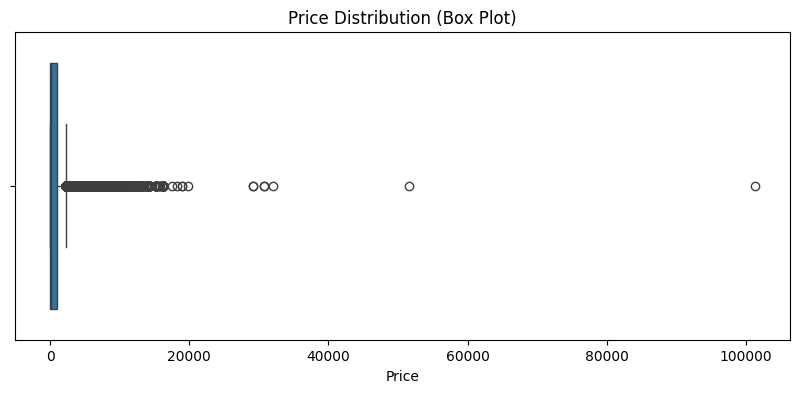

In [ ]:
# Histogram to view the overall distribution of 'price'
plt.figure(figsize=(10, 6))
sns.histplot(data["price"], bins=50, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# Box plot to identify outliers, particularly above 10,000
plt.figure(figsize=(10, 4))
sns.boxplot(x=data["price"])
plt.title("Price Distribution (Box Plot)")
plt.xlabel("Price")
plt.show()


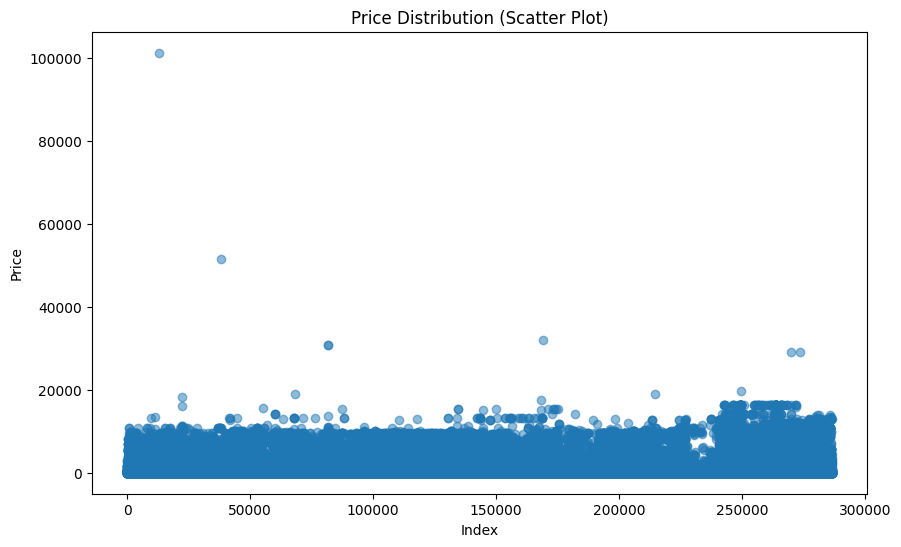

In [ ]:

# Scatter plot of price values
plt.figure(figsize=(10, 6))
plt.scatter(data.index, data["price"], alpha=0.5)
plt.title("Price Distribution (Scatter Plot)")
plt.xlabel("Index")
plt.ylabel("Price")
plt.show()


In [ ]:
# Removing records where "price" is less than .5 (considered as misinformation)
data = data.drop(data[data["price"] < 0.5 ].index)


# Removing records where "price" is greater than or equal to 20,000
data = data.drop(data[data["price"] >= 20000].index)


IMPUTING CORRECT VALUES & REMOVING OUTLIERS IN "VALUE"

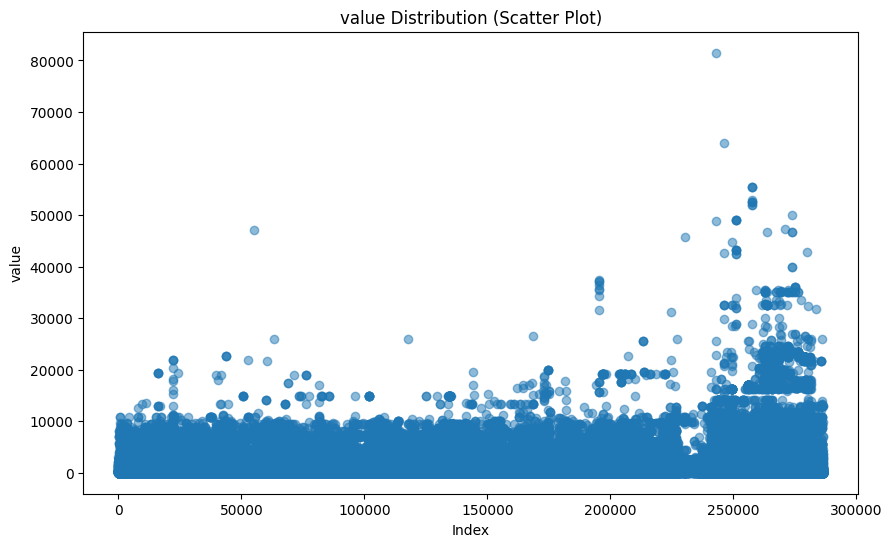

In [ ]:
# Scatter plot of price values
plt.figure(figsize=(10, 6))
plt.scatter(data.index, data["value"], alpha=0.5)
plt.title("value Distribution (Scatter Plot)")
plt.xlabel("Index")
plt.ylabel("value")
plt.show()

In [ ]:
# Replacing all values in "value" with (price * qty_ordered)
data["value"] = data["price"] * data["qty_ordered"]


In [ ]:

# Removing records where "value" is greater than 60,000 (since most values are below this limit)
data = data.drop(data[data["value"] >= 60000].index)

REMOVING OUTLIERS IN "QTY_ORDERED"

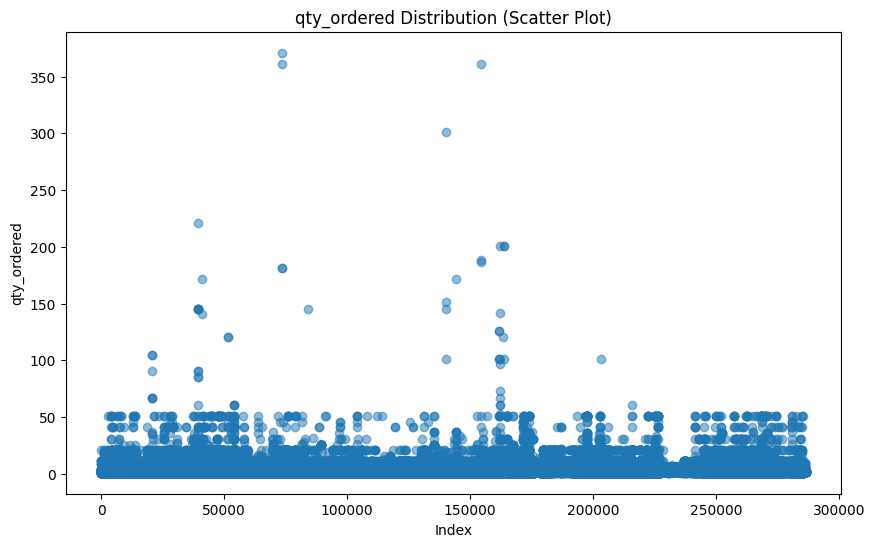

In [ ]:
# Scatter plot of price values
plt.figure(figsize=(10, 6))
plt.scatter(data.index, data["qty_ordered"], alpha=0.5)
plt.title("qty_ordered Distribution (Scatter Plot)")
plt.xlabel("Index")
plt.ylabel("qty_ordered")
plt.show()

In [ ]:
# Removing records where "qty_ordered" is greater than 250 (since most values are below this limit)
data = data.drop(data[data["qty_ordered"] > 250 ].index)

UPDATING "TOTAL"

In [ ]:
# Updating the "total" column with (price * qty_ordered) - discounted_price
data["total"] = (data["price"] * data["qty_ordered"]) - data["discount_amount"]


DUPLICATES & NULL VALUES

In [ ]:
# Checkin for duplicate records
data.duplicated().sum()

0

In [ ]:
# Checkin for null values
data.isnull().sum()

,0
order_id,0
order_date,0
status,0
item_id,0
sku,0
qty_ordered,0
price,0
value,0
discount_amount,0
total,0


### **TRANSFORMING**

TRANSFORMING "PAYMENT_METHOD"

In [ ]:
# Simplifying payment method
payment_mapping = {
    'cod': 'Cash',
    'cashatdoorstep': 'Cash',
    'Payaxis': 'Online_Wallet',
    'Easypay': 'Online_Wallet',
    'jazzwallet': 'Online_Wallet',
    'jazzvoucher': 'Online_Wallet',
    'easypay_voucher': 'Online_Wallet',
    'mcblite': 'Online_Wallet',
    'customercredit': 'Credit Card',
    'bankalfalah': 'Credit Card',
    'Easypay_MA': 'Other',
    'apg': 'Other',
    'financesettlement': 'Other'
}

# Mapping
data['payment_method'] = data['payment_method'].map(payment_mapping).fillna('Other')

print(data['payment_method'].unique())


['Cash' 'Online_Wallet' 'Other' 'Credit Card']


 CORRECTING "STATUS" CATEGORIES

In [ ]:
# Define for the status values
status_mapping = {
    'received': 'complete',
    'complete': 'complete',
    'paid': 'complete',
    'processing': 'complete',
    'payment_review': 'complete',
    'cod': 'complete',
    'closed': 'complete',
    'canceled': 'canceled',
    'refund': 'canceled',
    'order_refunded': 'canceled',
    'pending': 'pending',
    'pending_paypal': 'pending',
    'holded': 'pending'
}

# Replacing
data['status'] = data['status'].map(status_mapping)

print(data['status'].unique())

['complete' 'canceled' 'pending']


### **FEATURE ENGINEERING**

##### **GROUPING** SPECIFIC FEATURES AND CREATING DATA FRAME FOR UPCOMING FEATURE CREATION, EDA AND SEGMENT INTIALIZING

In [ ]:
amazon_data = data[["cust_id", "order_id", "full_name", "Gender", "age", "qty_ordered","category" , "order_date", "total", "payment_method", "year", "month", "Sign in date", "City", "State", "County", "Region"]]

In [ ]:
data.columns

Index(['order_id', 'order_date', 'status', 'item_id', 'sku', 'qty_ordered',
       'price', 'value', 'discount_amount', 'total', 'category',
       'payment_method', 'bi_st', 'cust_id', 'year', 'month', 'ref_num',
       'Name Prefix', 'First Name', 'Middle Initial', 'Last Name', 'Gender',
       'age', 'full_name', 'E Mail', 'Sign in date', 'Phone No. ',
       'Place Name', 'County', 'City', 'State', 'Zip', 'Region', 'User Name',
       'Discount_Percent'],
      dtype='object')

In [ ]:
len(amazon_data.columns)

17

In [ ]:
amazon_data.columns

Index(['cust_id', 'order_id', 'full_name', 'Gender', 'age', 'qty_ordered',
       'category', 'order_date', 'total', 'payment_method', 'year', 'month',
       'Sign in date', 'City', 'State', 'County', 'Region'],
      dtype='object')

##### CREATING A FEATURE "PURCHASE_COUNT" GROUPIN BY CUSTOMER ID AND COUNTING BY NO OF PURCHASE

In [ ]:
frequency_data = amazon_data.groupby('cust_id').size().reset_index(name='purchase_count')
amazon_data = amazon_data.merge(frequency_data, on='cust_id', how='left')


##### CREATING A FEATURE "DAYS_LAST_PURCHASE" GROUPED BY ID AND CREATED BY COUNTING DAYS FROM THE DATE OF LAST PURCHASE

In [ ]:
# Converting datetime format
amazon_data['order_date'] = pd.to_datetime(amazon_data['order_date'], format='%d/%m/%Y', errors='coerce')

# Droping invalid dates
amazon_data = amazon_data.dropna(subset=['order_date'])

# specific date for calculation
specific_date = pd.to_datetime('2022-01-01')

# Calculating max date and counting days
recency_data = amazon_data.groupby('cust_id')['order_date'].max().reset_index()
recency_data['days_last_purchase'] = (specific_date - recency_data['order_date']).dt.days
recency_data = recency_data[['cust_id', 'days_last_purchase']]

# Merging
amazon_data = pd.merge(amazon_data, recency_data, on='cust_id', how='left')

##### CREATING A FEATURE "TOTAL_SPENT" BY ADDING ALL PURCHASE FROM THE CUSTOMER

In [ ]:
  # Total spending by each customer
monetary_data = amazon_data.groupby('cust_id')['total'].sum().reset_index(name='total_spent')

# Merging
amazon_data = amazon_data.merge(monetary_data, on='cust_id', how='left')

In [ ]:
amazon_data.head()

,cust_id,order_id,full_name,Gender,age,qty_ordered,category,order_date,total,payment_method,year,month,Sign in date,City,State,County,Region,purchase_count,days_last_purchase,total_spent
0,60124,100354678,"Titus, Jani",F,43,21,Men's Fashion,2020-10-01,1887.9,Cash,2020,Oct-20,8/22/2006,Vinson,OK,Harmon,South,7,414,4539.9
1,60124,100354678,"Titus, Jani",F,43,11,Men's Fashion,2020-10-01,209.0,Cash,2020,Oct-20,8/22/2006,Vinson,OK,Harmon,South,7,414,4539.9
2,60124,100354680,"Titus, Jani",F,43,9,Men's Fashion,2020-10-01,1349.1,Cash,2020,Oct-20,8/22/2006,Vinson,OK,Harmon,South,7,414,4539.9
3,60124,100354680,"Titus, Jani",F,43,9,Men's Fashion,2020-10-01,719.1,Cash,2020,Oct-20,8/22/2006,Vinson,OK,Harmon,South,7,414,4539.9
4,60124,100367357,"Titus, Jani",F,43,2,Men's Fashion,2020-11-13,199.8,Cash,2020,Nov-20,8/22/2006,Vinson,OK,Harmon,South,7,414,4539.9


## **EDA ( EXPLORATORY DATA ANALYSIS )**

##### **GENERAL ANALYSIS**

###### **Customer Insights**

**GENDER**

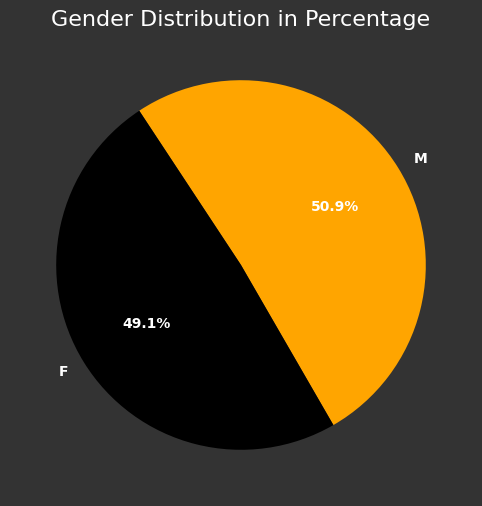

In [ ]:
# Plotting pie chart for gender

# Count
gender_counts = amazon_data['Gender'].value_counts()

plt.figure(figsize=(8, 6))
plt.gcf().set_facecolor('#333333')
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=300, colors=['#FFA500','#000000'], textprops={'color': 'white', 'weight': 'bold'})
plt.title("Gender Distribution in Percentage", color="white", fontsize=16)

plt.show()

The count of male and female customers is equal

**AGE DISTRIBUTION BY CUSTOMER**

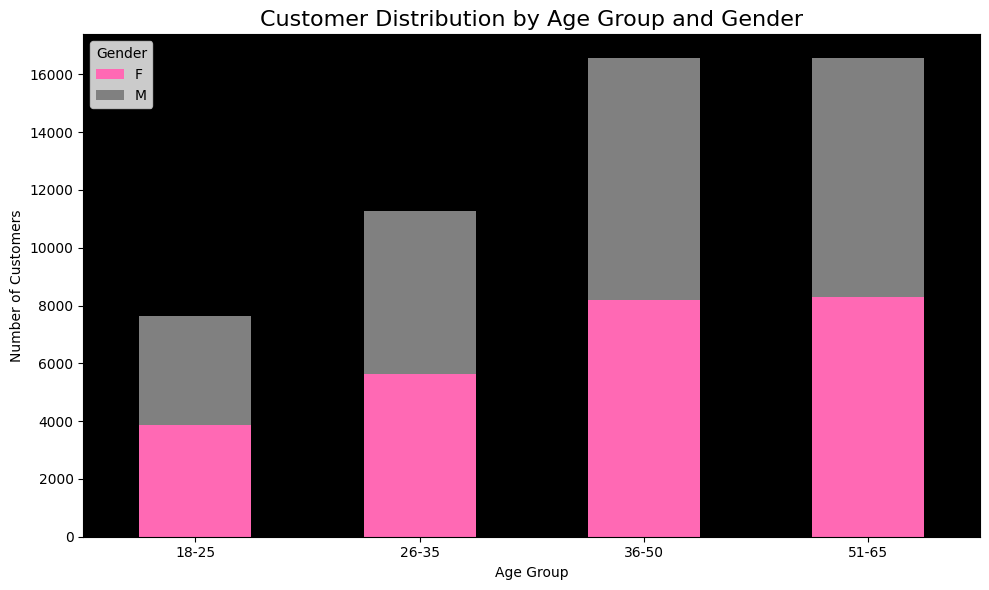

In [ ]:
# age categories
age_bins = [18, 25, 35, 50, 65]
age_labels = ['18-25', '26-35', '36-50', '51-65']

# Creating a new column 'age_group'
amazon_data['age_group'] = pd.cut(amazon_data['age'], bins=age_bins, labels=age_labels, right=False)

# Counting
age_gender_counts = amazon_data.groupby(['age_group', 'Gender'])['cust_id'].nunique().unstack(fill_value=0)

# Plotting
ax = age_gender_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#ff69b4', '#808080'])
plt.title("Customer Distribution by Age Group and Gender", fontsize=16)
plt.xlabel("Age Group")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)
plt.gca().set_facecolor('black')
plt.tight_layout()

plt.show()



Most customers are between the ages of 35 and 65, with an equal distribution of men and women

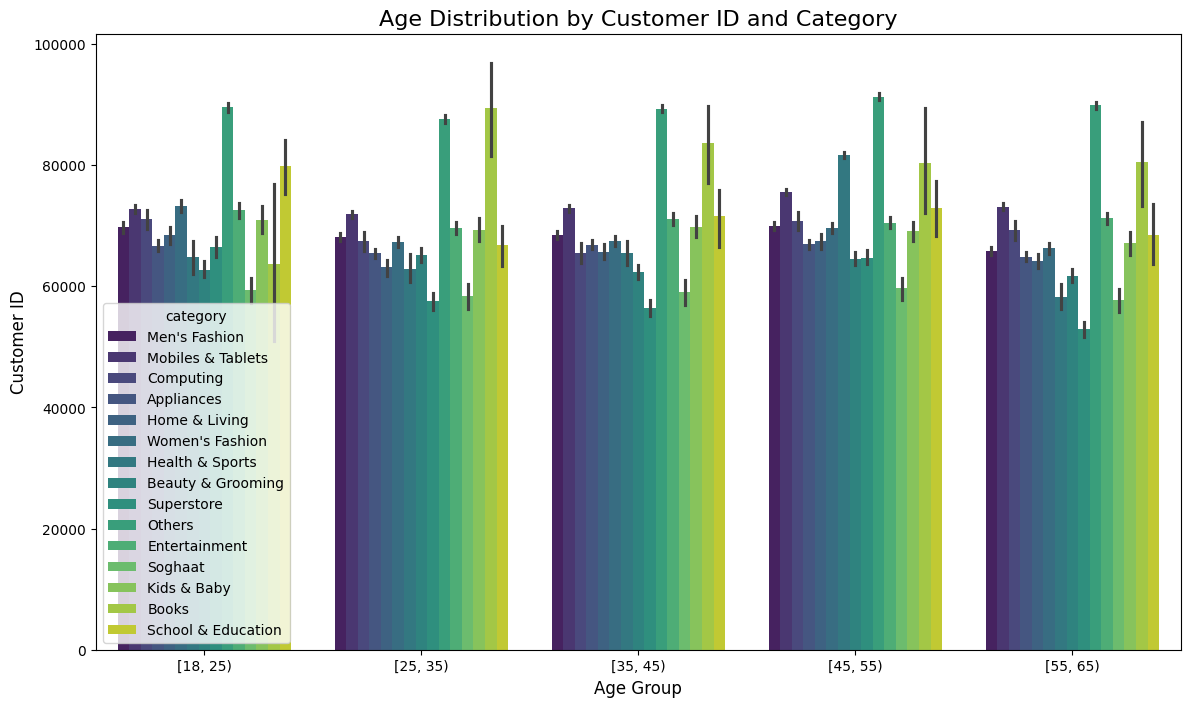

In [ ]:
# Plotting age by cust_id for categories
plt.figure(figsize=(14, 8))
sns.barplot(x=pd.cut(amazon_data['age'], bins=[18, 25, 35, 45, 55, 65], right=False),
            y=amazon_data['cust_id'], hue=amazon_data['category'], palette='viridis')
plt.title("Age Distribution by Customer ID and Category", fontsize=16)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Customer ID", fontsize=12)

plt.show()


The product category distribution on age is neutral




In [ ]:
amazon_data.drop("age_group", axis=1, inplace=True)

###### **Sales Insights**

**ORDERS BY MONTHS**

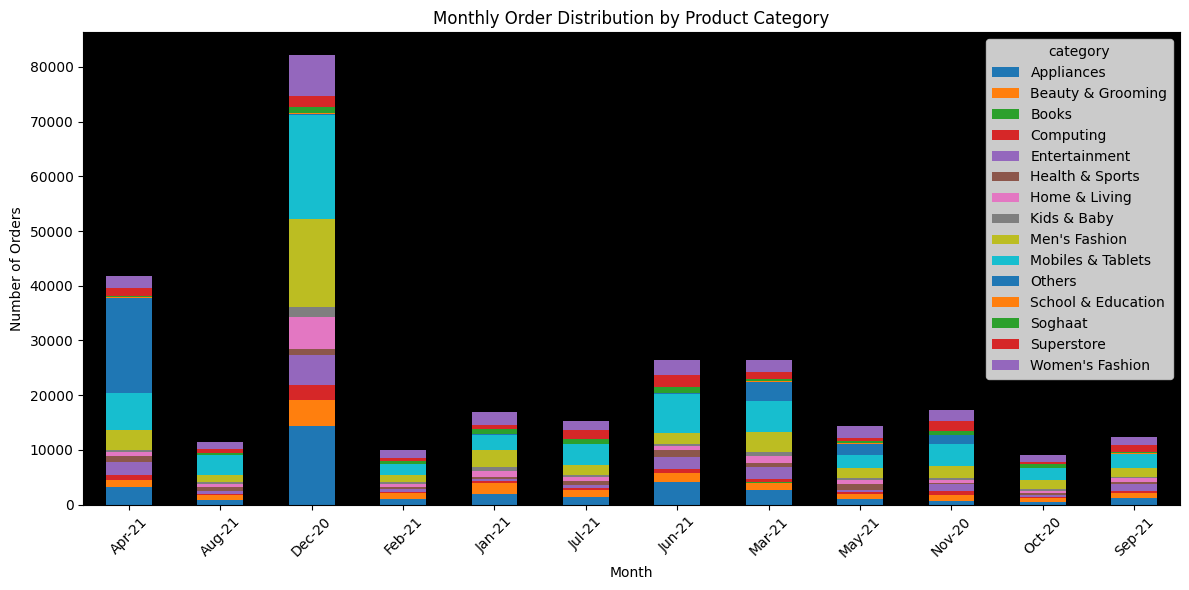

In [ ]:
# Plotting AGE & 'product_category'
category_monthly_data = amazon_data.groupby(['month', 'category']).size().reset_index(name='order_count')

# product category separates column
category_monthly_data_pivot = category_monthly_data.pivot(index='month', columns='category', values='order_count').fillna(0)

category_monthly_data_pivot.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Monthly Order Distribution by Product Category')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.gca().set_facecolor('black')
plt.tight_layout()
plt.show()


In December 2020, the orders were so high because the USA was under a full lockdown on 2020. After November, deliveries and online orders became more accessible, leading to peak in e-commerce activity (Amazon orders), during December. Additionally, December is a festive month, with events like Christmas and New Year. ( Most purchased product category - Appliances, mobiles & tabs, mens fashions, others, entertainment )

In April 2021, the orders were high because it marked the beginning of the summer vacation season. Additionally, Amazon expanded ( due to the demand of pandemic ) its logistics and fulfillment throughout 2021, with significant improvements made after March.




 **PRODUCT CATEGORY DISTRIBUTION**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, "Men's Fashion"),
  Text(1, 0, 'Mobiles & Tablets'),
  Text(2, 0, 'Computing'),
  Text(3, 0, 'Appliances'),
  Text(4, 0, 'Home & Living'),
  Text(5, 0, "Women's Fashion"),
  Text(6, 0, 'Health & Sports'),
  Text(7, 0, 'Beauty & Grooming'),
  Text(8, 0, 'Superstore'),
  Text(9, 0, 'Others'),
  Text(10, 0, 'Entertainment'),
  Text(11, 0, 'Soghaat'),
  Text(12, 0, 'Kids & Baby'),
  Text(13, 0, 'Books'),
  Text(14, 0, 'School & Education')])

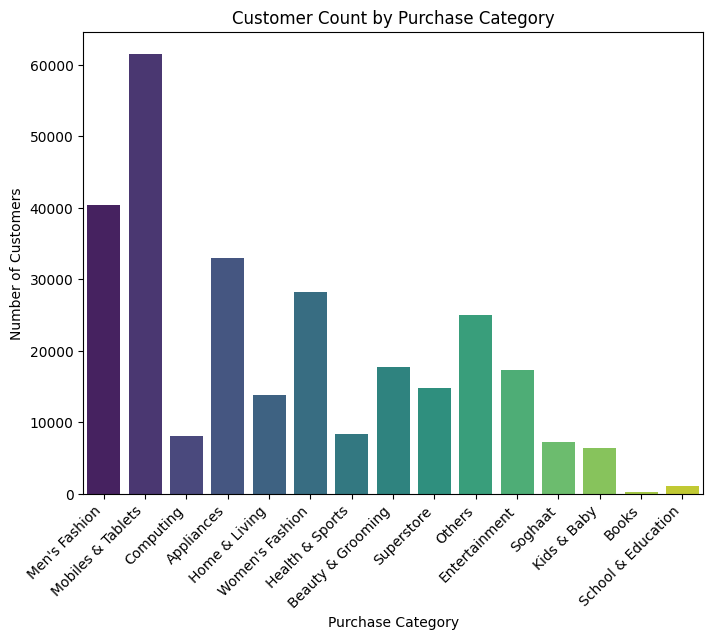

In [ ]:
# plotting product category

plt.figure(figsize=(8, 6))
sns.countplot(data=amazon_data, x='category', palette="viridis")
plt.title("Customer Count by Purchase Category")
plt.xlabel("Purchase Category")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45, ha="right")

**MOST ORDERED PRODUCT CATEGORY :**

* Mobile & Tablets
* Men's fashion
* Women's fashion
* Appliances

**LEAST ORDERED**

* Books
* School & education

**SALES TREND**

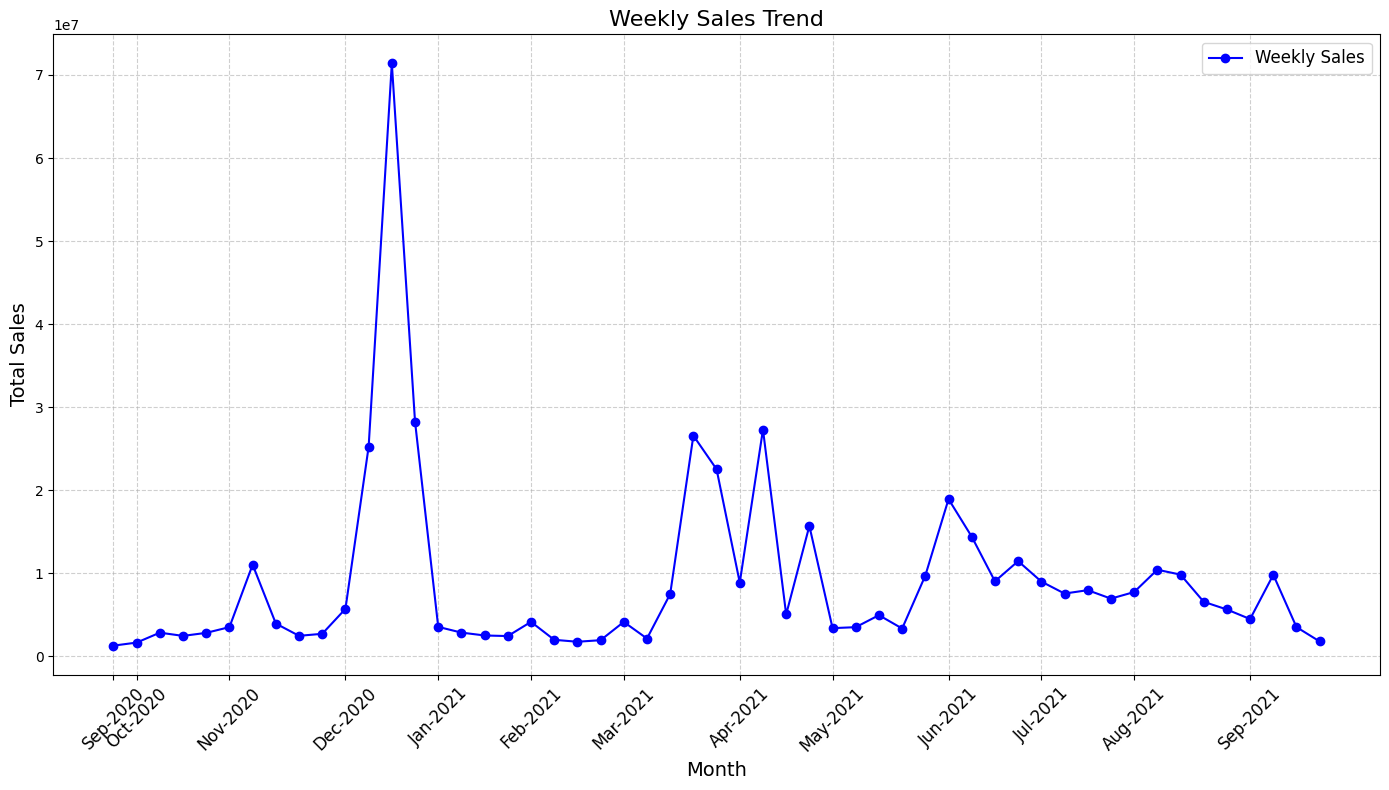

In [ ]:
# SALES TREND CHART

# grouping by week
amazon_data['week'] = amazon_data['order_date'].dt.to_period('W')

#  sales by week
weekly_sales = amazon_data.groupby('week')['total'].sum().reset_index()
weekly_sales['week_start'] = weekly_sales['week'].apply(lambda x: x.start_time)

# months for labeling
weekly_sales['month'] = weekly_sales['week_start'].dt.to_period('M')
month_labels = weekly_sales.groupby('month')['week_start'].min().reset_index()

# Plotting
plt.figure(figsize=(14, 8))
plt.plot(weekly_sales['week_start'], weekly_sales['total'], marker='o', color='blue', label='Weekly Sales')
plt.title('Weekly Sales Trend', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(month_labels['week_start'],
           month_labels['month'].dt.strftime('%b-%Y'),
           rotation=45, fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()

plt.show()


**PAYMENT METHOD**

In [ ]:
amazon_data["payment_method"].unique()

array(['Cash', 'Online_Wallet', 'Other', 'Credit Card'], dtype=object)

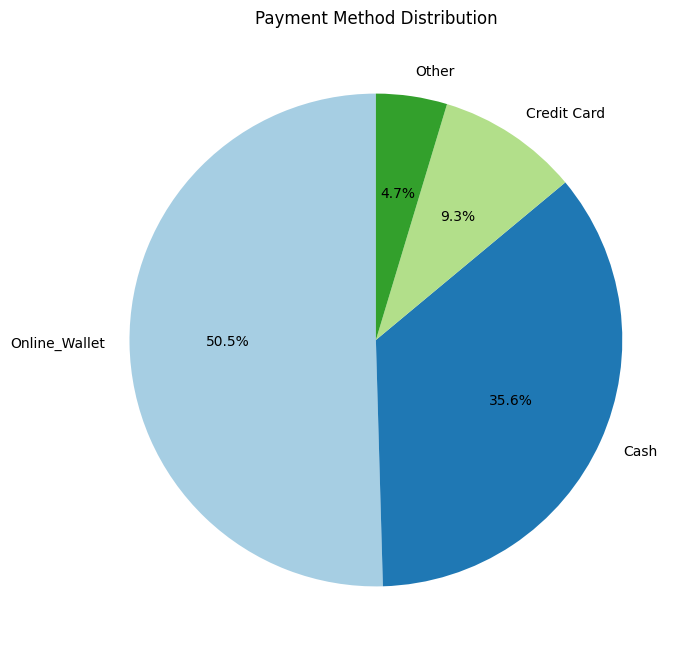

In [ ]:
# Calculate the percentage for each payment category
payment_counts = amazon_data['payment_method'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    payment_counts,
    labels=payment_counts.index,
    autopct='%1.1f%%',  # Display percentages with one decimal place
    startangle=90,      # Start angle for better readability
    colors=plt.cm.Paired.colors  # Optional: custom color palette
)
plt.title("Payment Method Distribution")
plt.show()


##### **CUSTOMER DISTRIBUTIONS ( 60k customers ) SEGMENT ANALYSIS**

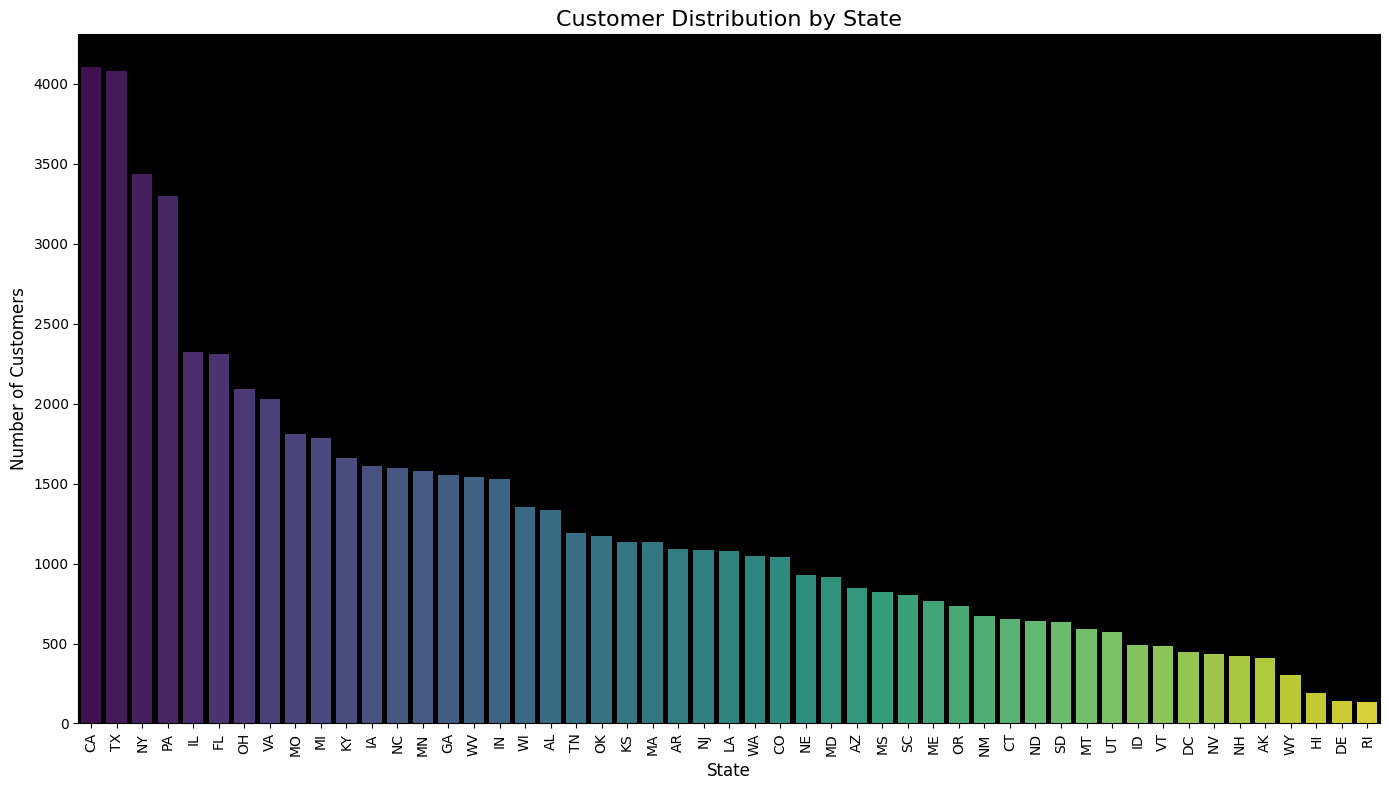

In [ ]:
# Group by 'State' and count
state_customer_counts = amazon_data.groupby('State')['cust_id'].nunique().reset_index()

# Sorting the data
state_customer_counts = state_customer_counts.sort_values(by='cust_id', ascending=False)

#plotting
plt.figure(figsize=(14, 8))
sns.barplot(data=state_customer_counts, x='State', y='cust_id', palette='viridis')
plt.title("Customer Distribution by State", fontsize=16)
plt.xlabel("State", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.gca().set_facecolor('black')
plt.show()


Top 5 state with the most customers :


*   California
*   Texas
*   Newyork
*   Pennsylvania
*   Illinois






In [ ]:
amazon_data.describe().T

,count,mean,min,25%,50%,75%,max,std
cust_id,283581.0,70125.451233,4.0,56640.0,74263.0,92372.0,115326.0,30184.974644
age,283581.0,46.529366,18.0,32.0,47.0,61.0,75.0,16.66353
qty_ordered,283581.0,2.975848,1.0,2.0,2.0,3.0,221.0,3.57377
order_date,283581,2021-03-12 08:37:53.179091712,2020-10-01 00:00:00,2020-12-24 00:00:00,2021-03-15 00:00:00,2021-05-18 00:00:00,2021-09-30 00:00:00,NaN
total,283581.0,1678.879573,1.0,125.0,323.82,1979.2,59999.4,3462.592894
year,283581.0,2020.617104,2020.0,2020.0,2021.0,2021.0,2021.0,0.486094
purchase_count,283581.0,53.18272,1.0,4.0,9.0,29.0,2524.0,243.289113
days_last_purchase,283581.0,247.77411,93.0,163.0,246.0,356.0,457.0,99.996609
total_spent,283581.0,53078.60616,3.27,1240.0,7076.98,30548.27,3054497.5,197306.974849


**REMOVING OUTLIERS**

**Analyzing the 'Puchase_count' distribution to identify average purchase count range**

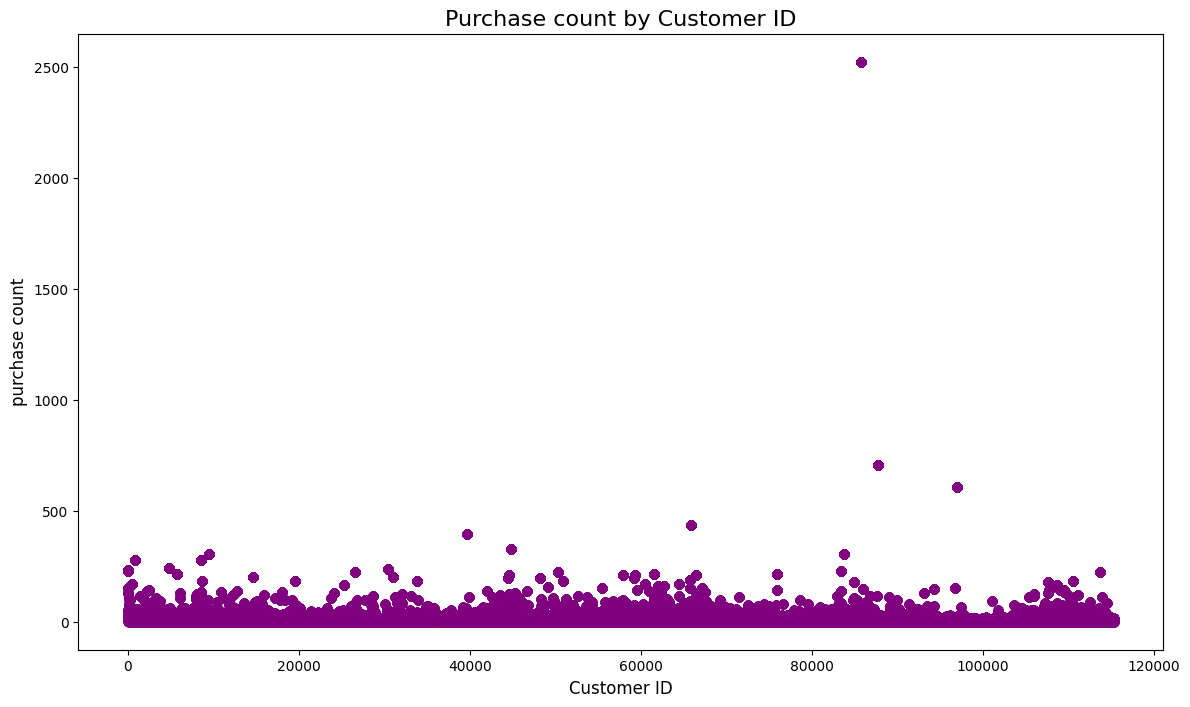

In [ ]:
# Scaatter plot for puchase count

plt.figure(figsize=(14, 8))
plt.scatter(amazon_data['cust_id'], amazon_data['purchase_count'], color='purple', alpha=0.7)
plt.title("Purchase count by Customer ID", fontsize=16)
plt.xlabel("Customer ID", fontsize=12)
plt.ylabel("purchase count", fontsize=12)
plt.show()


In [ ]:
# Checking where most customers fall
ranges = [(10,20),(20, 30), (30, 40), (100, 150)]

# purchase_count in ranges
for lower, upper in ranges:
    count = amazon_data[(amazon_data["purchase_count"] >= lower) &
                        (amazon_data["purchase_count"] < upper)].shape[0]

    print(f"Number of customers with purchase_count between {lower} and {upper}: {count}")


Number of customers with purchase_count between 10 and 20: 46423
Number of customers with purchase_count between 20 and 30: 22132
Number of customers with purchase_count between 30 and 40: 13999
Number of customers with purchase_count between 100 and 150: 11081


In [ ]:
# Dropping rows where 'purchase_count' is greater 40

amazon_data.drop(amazon_data[amazon_data["purchase_count"] > 40].index, inplace=True)



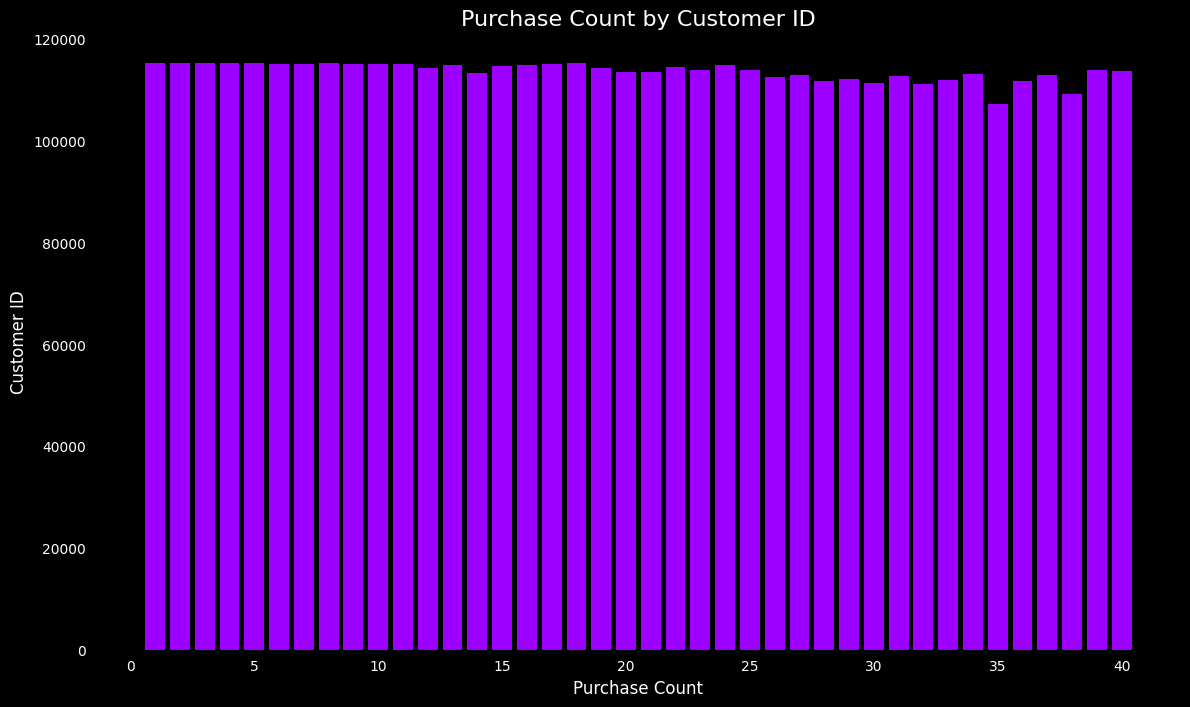

In [ ]:
plt.figure(figsize=(14, 8), facecolor='black')

# Plotting puchase count by cust id
plt.bar(amazon_data['purchase_count'], amazon_data['cust_id'], color='#9d00ff', alpha=0.8)


plt.title("Purchase Count by Customer ID", fontsize=16, color='white')
plt.xlabel("Purchase Count", fontsize=12, color='white')
plt.ylabel("Customer ID", fontsize=12, color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.gca().set_facecolor('black')

plt.show()

**Analyzing the 'TOTAL_SPENT' distribution to find the spending range where most customers fall**

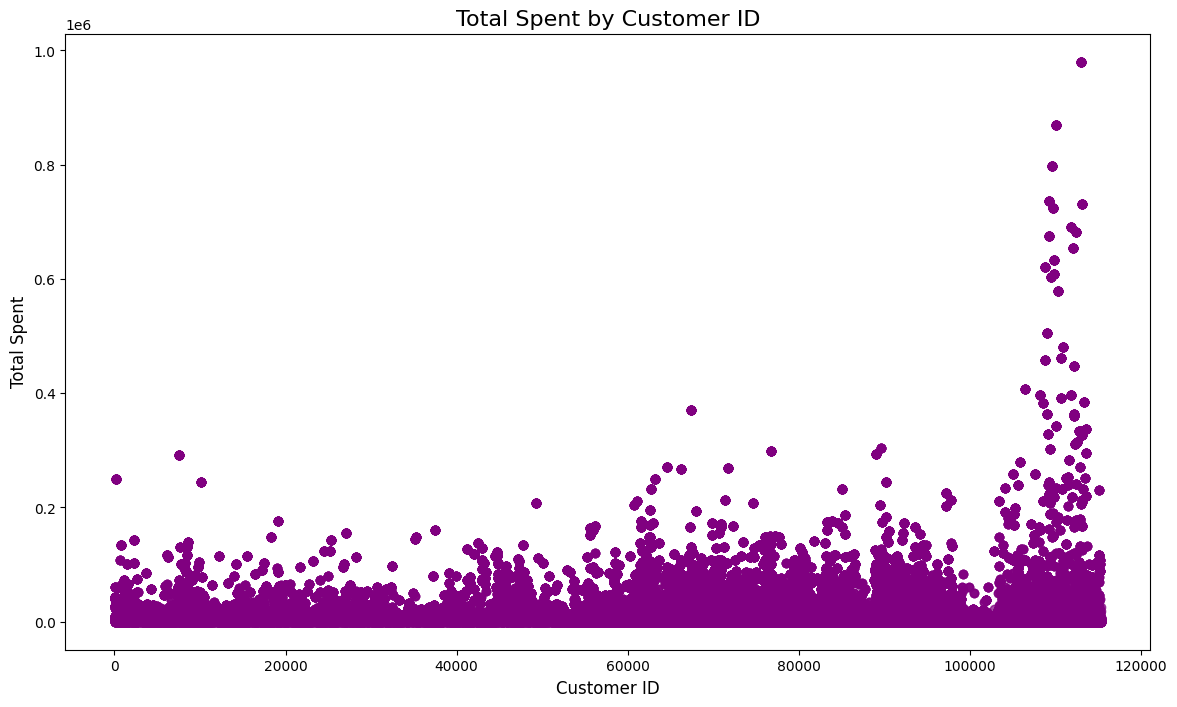

In [ ]:
# Scaatter plot for total_spent

plt.figure(figsize=(14, 8))
plt.scatter(amazon_data['cust_id'], amazon_data['total_spent'], color='purple', alpha=0.7)
plt.title("Total Spent by Customer ID", fontsize=16)
plt.xlabel("Customer ID", fontsize=12)
plt.ylabel("Total Spent", fontsize=12)
plt.show()


In [ ]:
# Checking where most customers fall
ranges = [(10,100),(100,500),(500,5000),(5000,10000),(10000, 20000)]

# Loop each range
for lower, upper in ranges:
    count = amazon_data[(amazon_data["total_spent"] >= lower) &
                        (amazon_data["total_spent"] < upper)]["cust_id"].nunique()

    print(f"Number of unique customers with total_spent between {lower} and {upper}: {count}")


Number of unique customers with total_spent between 10 and 100: 3677
Number of unique customers with total_spent between 100 and 500: 20064
Number of unique customers with total_spent between 500 and 5000: 24430
Number of unique customers with total_spent between 5000 and 10000: 6108
Number of unique customers with total_spent between 10000 and 20000: 4889


In [ ]:
# Converting 'total_spent' to numeric
amazon_data['total_spent'] = pd.to_numeric(amazon_data['total_spent'], errors='coerce')

# Dropping rows where 'total_spent' is greater than 5000
amazon_data.drop(amazon_data[amazon_data["total_spent"] > 5000].index, inplace=True)

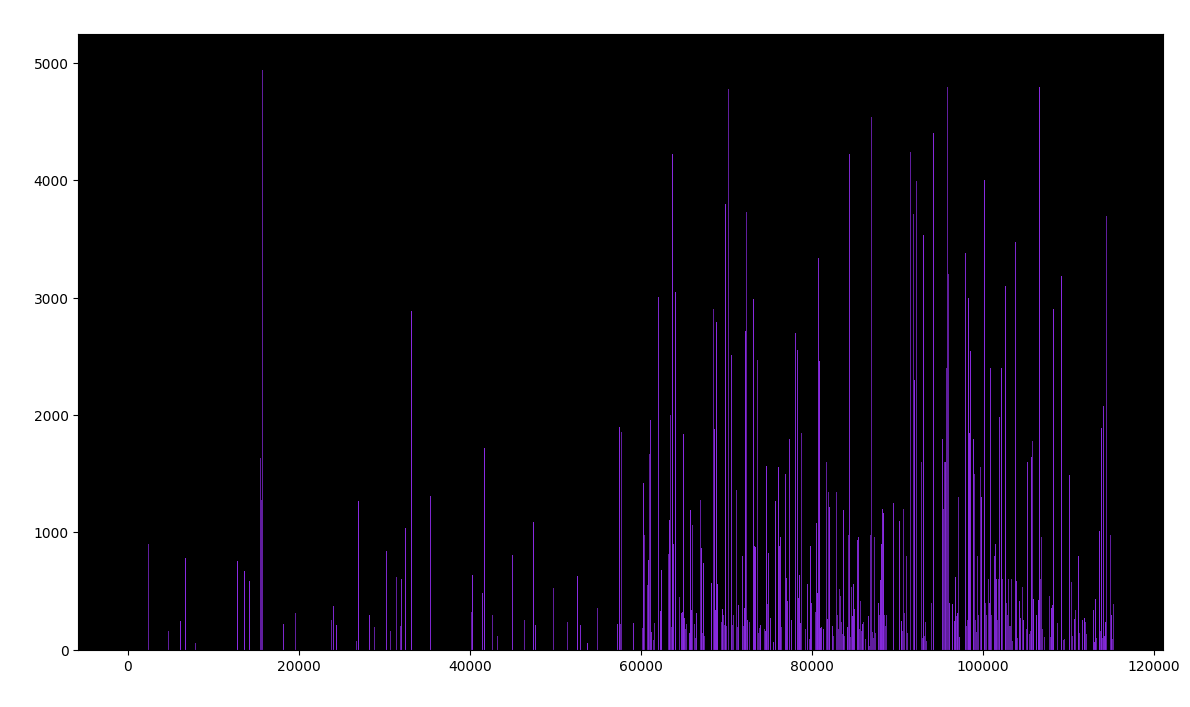

In [ ]:
# Plotting the bar chart for total_spent by cust_id
plt.figure(figsize=(14, 8))
plt.bar(amazon_data['cust_id'], amazon_data['total_spent'], color='#8A2BE2', alpha=0.7)
plt.title("Total Spent by Customer ID", fontsize=16, color='white')
plt.xlabel("Customer ID", fontsize=12, color='white')
plt.ylabel("Total Spent by the Customer", fontsize=12, color='white')
plt.gca().set_facecolor('black')

plt.show()


**Analyzing the 'Days_last_purchase' distribution to identify where the most customers fall**

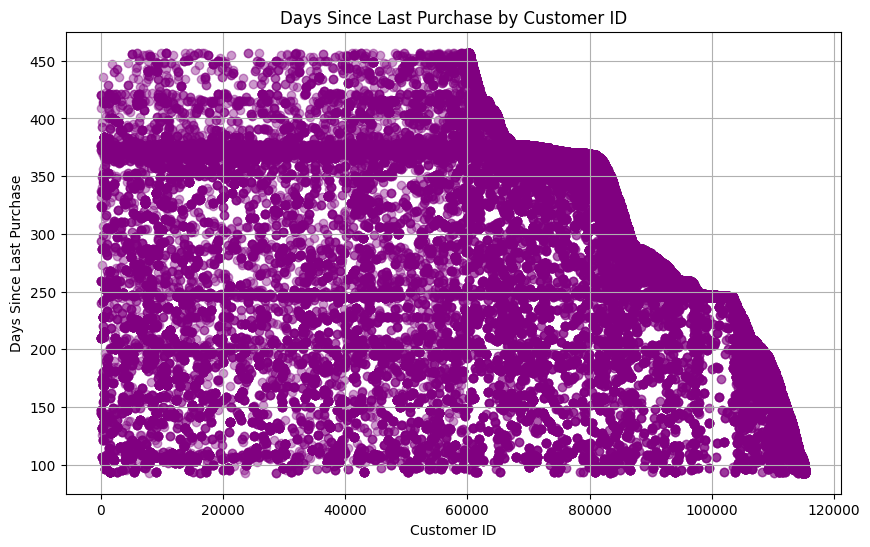

In [ ]:
# Scatter plot for days_last_purchase vs. cust_id
plt.figure(figsize=(10, 6))
plt.scatter(amazon_data['cust_id'], amazon_data['days_last_purchase'], color='purple', alpha=0.4)
plt.title("Days Since Last Purchase by Customer ID")
plt.xlabel("Customer ID")
plt.ylabel("Days Since Last Purchase")
plt.grid(True)
plt.show()


In [ ]:
# Grouping by customer and then checking the 'days_last_purchase'
ranges = [(93, 100), (100, 150), (150, 200), (200, 250), (250, 300), (300, 350), (350, 400), (400, 457), (457, 500)]

# Loop range
for lower, upper in ranges:
    filtered_data = amazon_data[(amazon_data["days_last_purchase"] >= lower) & (amazon_data["days_last_purchase"] < upper)]
    # counting unique customer IDs
    count = filtered_data.groupby('cust_id').size().shape[0]
    print(f"Number of customers with days_last_purchase between {lower} and {upper}: {count}")

Number of customers with days_last_purchase between 93 and 100: 355
Number of customers with days_last_purchase between 100 and 150: 3478
Number of customers with days_last_purchase between 150 and 200: 4007
Number of customers with days_last_purchase between 200 and 250: 10104
Number of customers with days_last_purchase between 250 and 300: 8404
Number of customers with days_last_purchase between 300 and 350: 3347
Number of customers with days_last_purchase between 350 and 400: 14369
Number of customers with days_last_purchase between 400 and 457: 4080
Number of customers with days_last_purchase between 457 and 500: 84


In [ ]:
# Dropping rows where 'purchase_count' is greater 40

amazon_data.drop(amazon_data[amazon_data["days_last_purchase"] > 350].index, inplace=True)

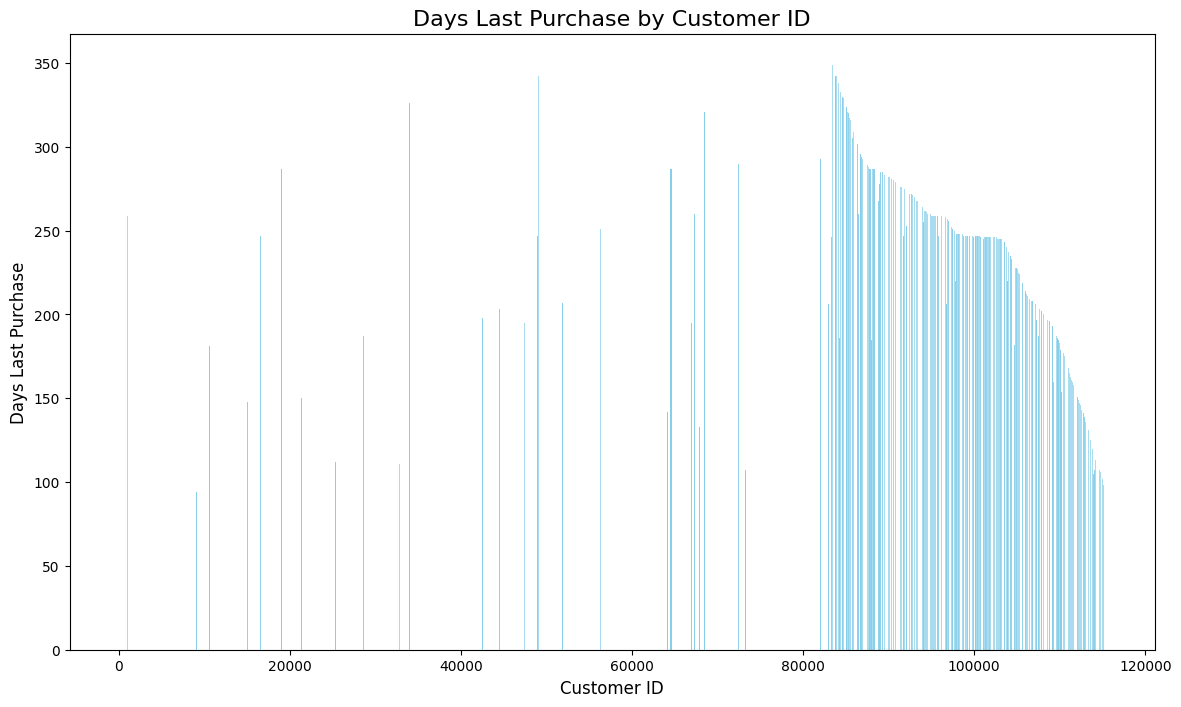

In [ ]:
# Plotting the bar chart for days_last_purchase
plt.figure(figsize=(14, 8))
plt.bar(amazon_data['cust_id'], amazon_data['days_last_purchase'], color='skyblue', alpha=0.7)
plt.title("Days Last Purchase by Customer ID", fontsize=16)
plt.xlabel("Customer ID", fontsize=12)
plt.ylabel("Days Last Purchase", fontsize=12)

plt.show()


## **K MEANS CLUSTERING**

In [ ]:
amazon_data.columns

Index(['cust_id', 'order_id', 'full_name', 'Gender', 'age', 'qty_ordered',
       'category', 'order_date', 'total', 'payment_method', 'year', 'month',
       'Sign in date', 'City', 'State', 'County', 'Region', 'purchase_count',
       'days_last_purchase', 'total_spent', 'week'],
      dtype='object')

QUANTILING THE FEATURES

In [ ]:
amazon_data['days_category'] = pd.qcut(amazon_data['days_last_purchase'], q=[0, 0.33, 0.66, 1], labels=["least", "medium", "most"])
amazon_data['spent_category'] = pd.qcut(amazon_data['total_spent'], q=[0, 0.33, 0.66, 1], labels=["low", "medium", "high"])
amazon_data['purchase_category'] = pd.qcut(amazon_data['purchase_count'], q=[0, 0.33, 0.66, 1], labels=["less", "normal", "high"])


ENCODING THE FEATURES

In [ ]:
# mappings
category_mapping = {"least": 1, "medium": 0, "most": -1, "low": -1, "normal": 0, "high": 1,"less": -1, }

amazon_data['days_score'] = amazon_data['days_category'].map(category_mapping).fillna(0).astype(int)
amazon_data['spent_score'] = amazon_data['spent_category'].map(category_mapping).fillna(0).astype(int)
amazon_data['purchase_score'] = amazon_data['purchase_category'].map(category_mapping).fillna(0).astype(int)


In [ ]:
amazon_data.columns

Index(['cust_id', 'order_id', 'full_name', 'Gender', 'age', 'qty_ordered',
       'category', 'order_date', 'total', 'payment_method', 'year', 'month',
       'Sign in date', 'City', 'State', 'County', 'Region', 'purchase_count',
       'days_last_purchase', 'total_spent', 'week', 'days_category',
       'spent_category', 'purchase_category', 'days_score', 'spent_score',
       'purchase_score'],
      dtype='object')

DROPPING UNWANTED FEATURES

In [ ]:
amazon_data.drop(["qty_ordered", "category", "order_date","total","order_id", "payment_method","year", "month", "Sign in date", "City", "County", "Region" ], axis=1, inplace=True)

GROUPING AND CREATING NEW DATAFRAME

In [ ]:
# Reseting the indexing

amazon_data_K = amazon_data.groupby('cust_id').agg({
    'full_name': 'first',
    'Gender': 'first',
    'age': 'first',
    'State': 'first',
    'purchase_count': 'first',
    'days_last_purchase': 'first',
    'total_spent': 'first',
    'days_category': 'first',
    'spent_category': 'first',
    'purchase_category': 'first',
    'days_score': 'first',
    'spent_score': 'first',
    'purchase_score': 'first'
}).reset_index()

print(amazon_data_K)

       cust_id          full_name Gender  age State  purchase_count  \
0           15    Diebold, Debbie      F   69    IN               6   
1           21          Kan, Adam      M   34    MD               1   
2           23   Bostwick, Roscoe      M   66    ME               6   
3           70     Smoot, Jessika      F   35    NJ               2   
4           81     Laseter, Santa      F   70    MA               7   
...        ...                ...    ...  ...   ...             ...   
29814   115318         Thao, Odis      M   57    DC               1   
29815   115320           West, Ty      M   59    PA               3   
29816   115322      Nowak, Shaina      F   56    PA               2   
29817   115324   Brunetti, Bennie      M   52    GA               1   
29818   115325  Giusti, Francesca      F   38    NC               2   

       days_last_purchase  total_spent days_category spent_category  \
0                     324       415.10          most            low   
1    

PREDICTING USING K - MEANS CLUSTERING

In [ ]:
# features for clustering
features = amazon_data_K[['days_score', 'spent_score', 'purchase_score']]

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
amazon_data_K['segment'] = kmeans.fit_predict(features)

print(amazon_data_K[['cust_id', 'days_score', 'spent_score', 'purchase_score', 'segment']])


       cust_id  days_score  spent_score  purchase_score  segment
0           15          -1           -1               0        0
1           21          -1           -1              -1        0
2           23           1            0               0        1
3           70           0           -1              -1        0
4           81          -1            1               0        2
...        ...         ...          ...             ...      ...
29814   115318           1           -1              -1        1
29815   115320           1           -1               0        1
29816   115322           1           -1              -1        1
29817   115324           1           -1              -1        1
29818   115325           1           -1              -1        1

[29819 rows x 5 columns]


CENTROIDS

In [ ]:
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns=['days_score', 'spent_score', 'purchase_score'])

print("Centroids of the clusters:")
print(centroid_df)


Centroids of the clusters:
   days_score  spent_score  purchase_score
0   -0.582213    -0.878152       -0.898714
1    0.747450    -0.253694       -0.517018
2   -0.608047     0.753907       -0.217712


**AFTER ALL THESE ANALYSIS, I FINALISED THE SEGMENT'S CATEGORY** :

**SEGMENT 0**: The model labeled  as '0', where most negative values were observed, representing "Inactive" customers.

**SEGMENT 1**: The model labeled  as '1', where most neutral values were found, representing "Casual" customers.

SEGMENT 2: The model labeled  as '2', where most positive values were present, representing "Regular" customers.

SEGMENT INITIALIZING : ( Inactive, casual, regular )

In [ ]:
# Replace numeric values into strings
amazon_data_K['segment'].replace({0: 'Inactive', 1: 'Casual', 2: 'Regular'}, inplace=True)

PIE CHART FOR SEMENT DISTRIBUTION

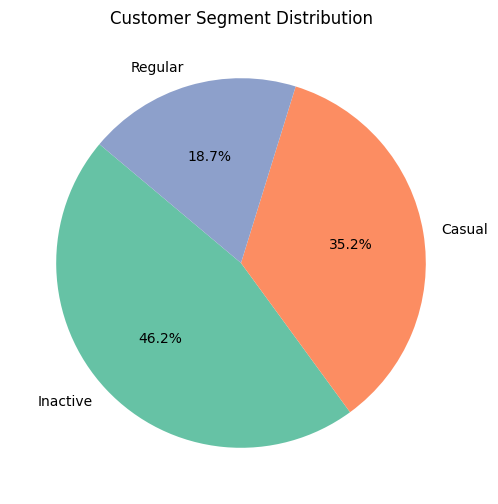

In [ ]:
segment_counts = amazon_data_K["segment"].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140, colors=["#66c2a5", "#fc8d62", "#8da0cb"])
plt.title("Customer Segment Distribution")
plt.show()


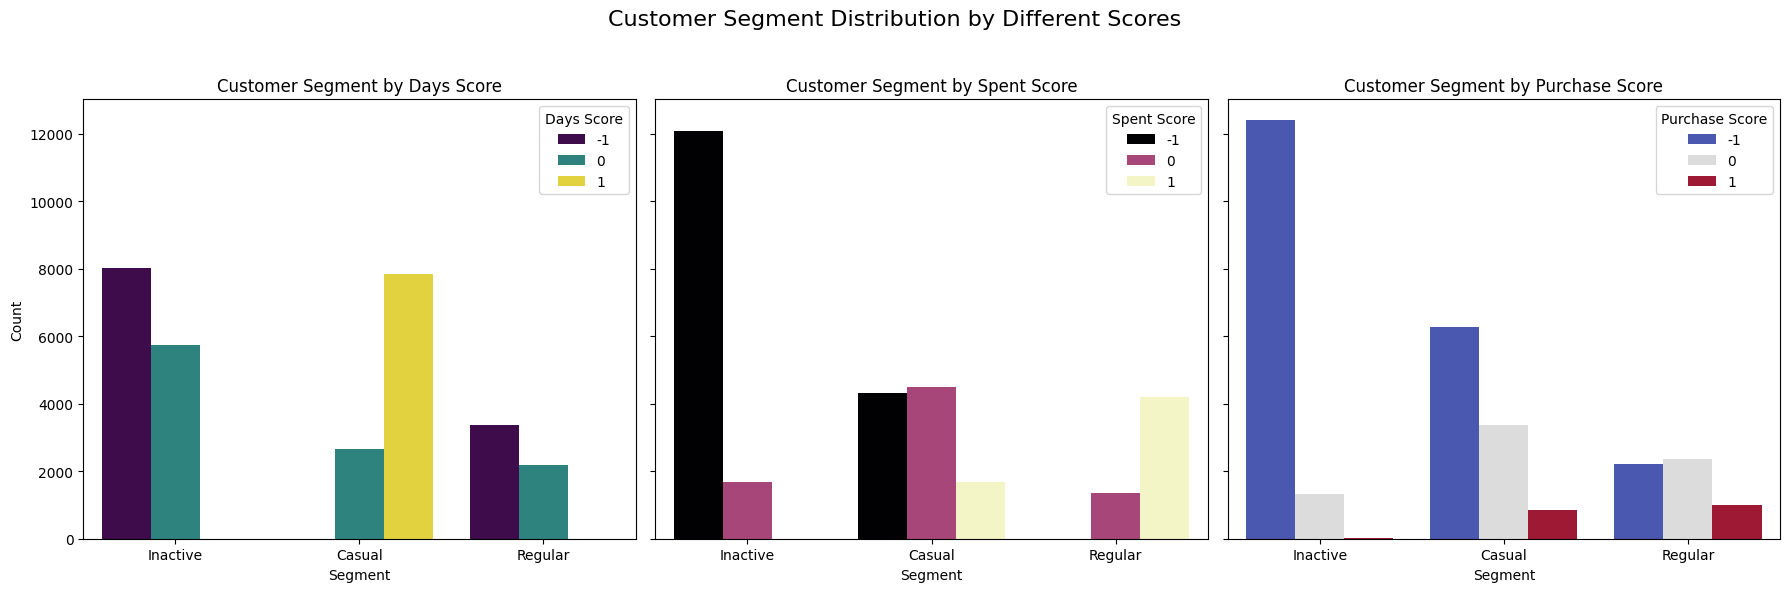

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Segment by days_score
sns.countplot(data=amazon_data_K, x='segment', hue='days_score', palette='viridis', ax=axes[0])
axes[0].set_title("Customer Segment by Days Score")
axes[0].set_xlabel("Segment")
axes[0].set_ylabel("Count")
axes[0].legend(title="Days Score")

# Segment by spent_score
sns.countplot(data=amazon_data_K, x='segment', hue='spent_score', palette='magma', ax=axes[1])
axes[1].set_title("Customer Segment by Spent Score")
axes[1].set_xlabel("Segment")
axes[1].legend(title="Spent Score")

# Segment by purchase_score
sns.countplot(data=amazon_data_K, x='segment', hue='purchase_score', palette='coolwarm', ax=axes[2])
axes[2].set_title("Customer Segment by Purchase Score")
axes[2].set_xlabel("Segment")
axes[2].legend(title="Purchase Score")


plt.suptitle("Customer Segment Distribution by Different Scores", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit title
plt.show()


## **HIERARCHY CLUSTERING**

In [ ]:
amazon_data_h = amazon_data_K.copy()
amazon_data_h = amazon_data_h.drop("segment",axis=1)

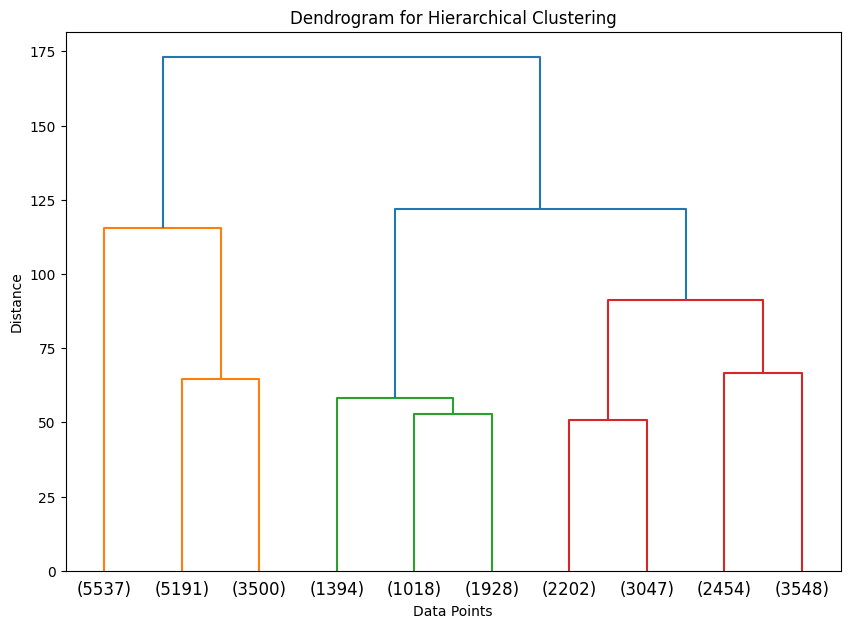

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# clustering
features = amazon_data_h[['days_score', 'spent_score', 'purchase_score']]

# Hierarchical Clustering
linkage_matrix = linkage(features, method='ward')

# Plot
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode='lastp', p=10, show_leaf_counts=True)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

# cluster labels
amazon_data_h['h_segment'] = fcluster(linkage_matrix, 3, criterion='maxclust')  # 3 clusters

# Map the clusters
amazon_data_h['h_segment'].replace({1: 'Inactive', 2: 'Casual', 3: 'Regular'}, inplace=True)



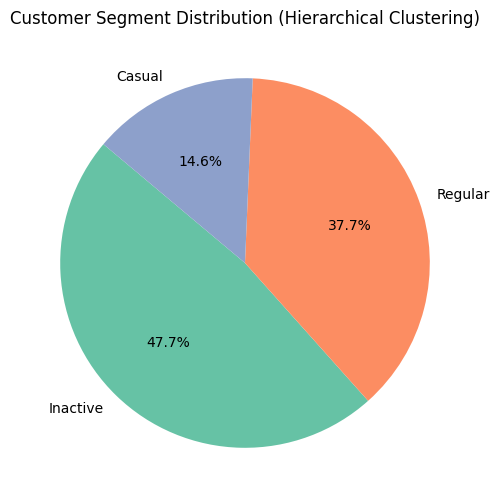

In [ ]:
# Pie Chart
h_segment_counts = amazon_data_h["h_segment"].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(h_segment_counts, labels=h_segment_counts.index, autopct='%1.1f%%', startangle=140, colors=["#66c2a5", "#fc8d62", "#8da0cb"])
plt.title("Customer Segment Distribution (Hierarchical Clustering)")
plt.show()


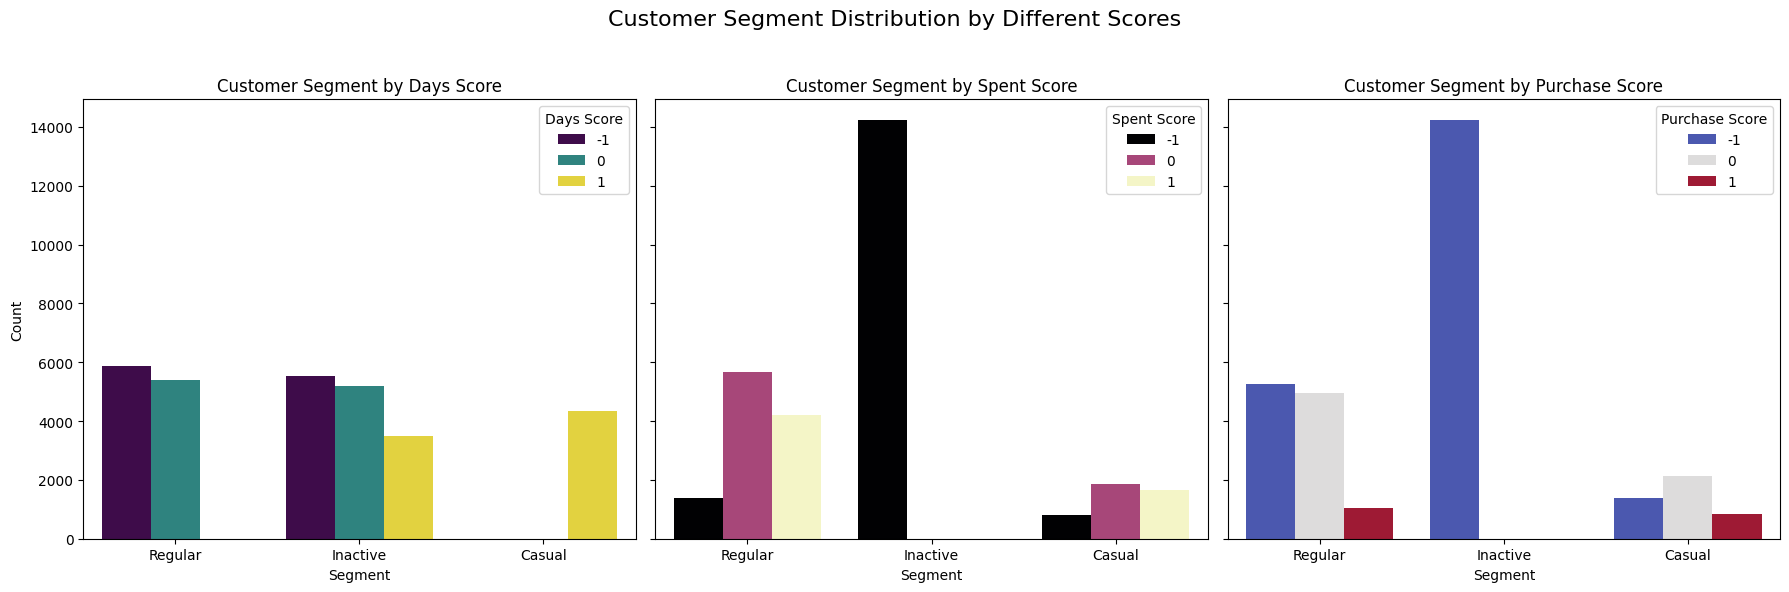

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Segment by days_score
sns.countplot(data=amazon_data_h, x='h_segment', hue='days_score', palette='viridis', ax=axes[0])
axes[0].set_title("Customer Segment by Days Score")
axes[0].set_xlabel("Segment")
axes[0].set_ylabel("Count")
axes[0].legend(title="Days Score")

# Segment by spent_score
sns.countplot(data=amazon_data_h, x='h_segment', hue='spent_score', palette='magma', ax=axes[1])
axes[1].set_title("Customer Segment by Spent Score")
axes[1].set_xlabel("Segment")
axes[1].legend(title="Spent Score")

# Segment by purchase_score
sns.countplot(data=amazon_data_h, x='h_segment', hue='purchase_score', palette='coolwarm', ax=axes[2])
axes[2].set_title("Customer Segment by Purchase Score")
axes[2].set_xlabel("Segment")
axes[2].legend(title="Purchase Score")


plt.suptitle("Customer Segment Distribution by Different Scores", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [ ]:
h_centroids = amazon_data_h.groupby('h_segment')[['days_score', 'spent_score', 'purchase_score']].mean()
print("Centroids for Hierarchical Clustering Segments:")
print(h_centroids)


Centroids for Hierarchical Clustering Segments:
           days_score  spent_score  purchase_score
h_segment                                         
Casual       1.000000     0.197005       -0.131106
Inactive    -0.143168    -1.000000       -1.000000
Regular     -0.520931     0.250911       -0.373922


## **GMM**




In [ ]:
amazon_data_g = amazon_data_K.copy()
amazon_data_g = amazon_data_g.drop("segment",axis=1)

In [ ]:
from sklearn.mixture import GaussianMixture
import pandas as pd

# Features for clustering
features_g = amazon_data_g[['days_score', 'spent_score', 'purchase_score']]

# Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=42)
amazon_data_g['segment'] = gmm.fit_predict(features_g)

# Map the clusters
segment_mapping = {0: 'Inactive', 1: 'Casual', 2: 'Regular'}
amazon_data_g['segment'] = amazon_data_g['segment'].map(segment_mapping)


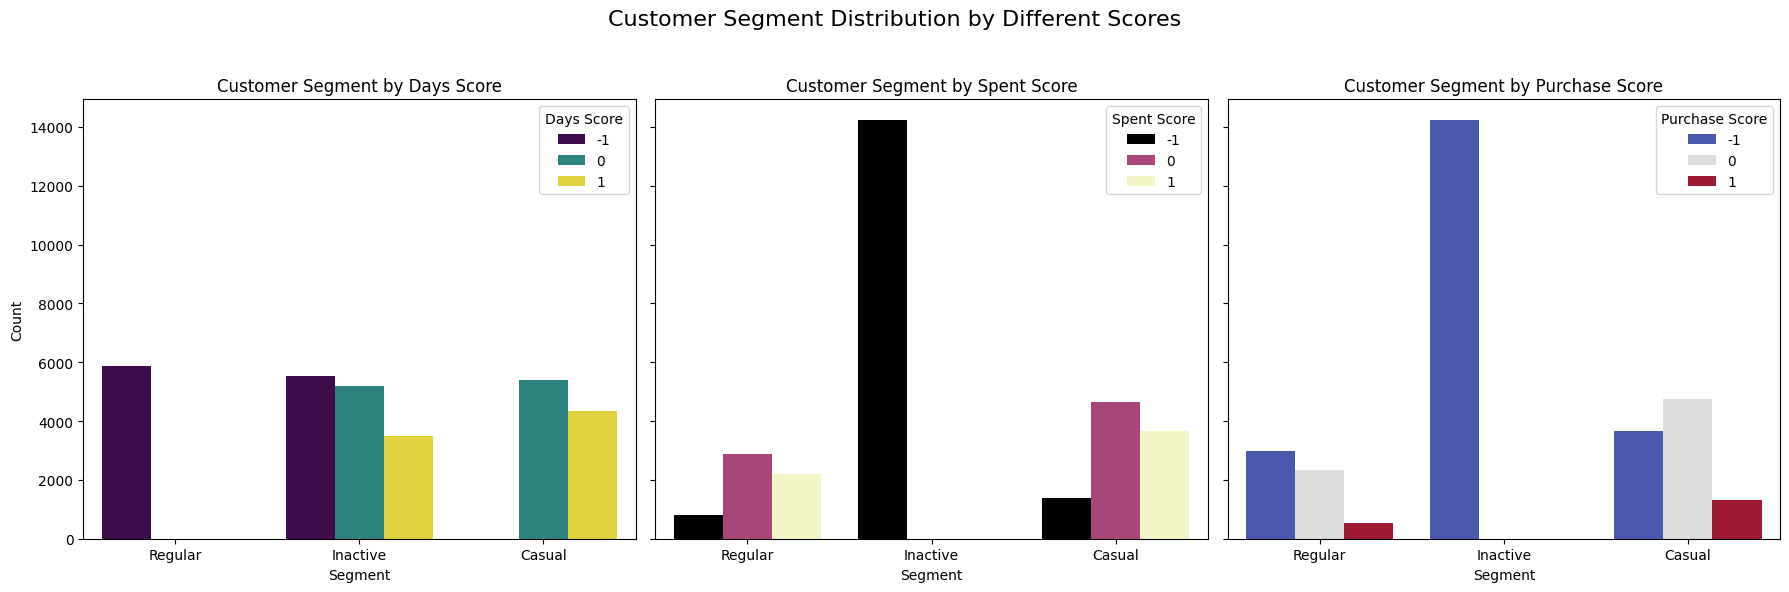

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Segment by days_score
sns.countplot(data=amazon_data_g, x='segment', hue='days_score', palette='viridis', ax=axes[0])
axes[0].set_title("Customer Segment by Days Score")
axes[0].set_xlabel("Segment")
axes[0].set_ylabel("Count")
axes[0].legend(title="Days Score")

# Segment by spent_score
sns.countplot(data=amazon_data_g, x='segment', hue='spent_score', palette='magma', ax=axes[1])
axes[1].set_title("Customer Segment by Spent Score")
axes[1].set_xlabel("Segment")
axes[1].legend(title="Spent Score")

# Segment by purchase_score
sns.countplot(data=amazon_data_g, x='segment', hue='purchase_score', palette='coolwarm', ax=axes[2])
axes[2].set_title("Customer Segment by Purchase Score")
axes[2].set_xlabel("Segment")
axes[2].legend(title="Purchase Score")


plt.suptitle("Customer Segment Distribution by Different Scores", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


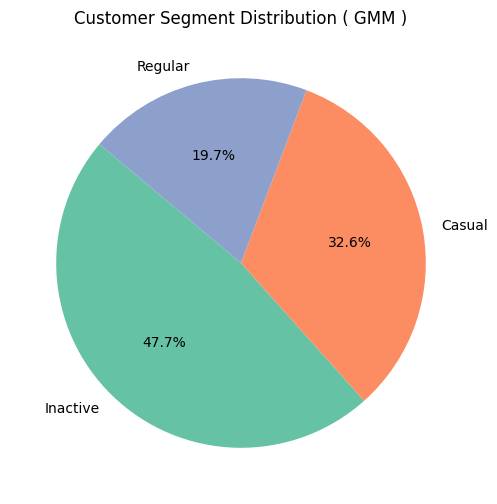

In [ ]:
# Pie Chart for Segment Distribution
g_segment_counts = amazon_data_g["segment"].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(g_segment_counts, labels=g_segment_counts.index, autopct='%1.1f%%', startangle=140, colors=["#66c2a5", "#fc8d62", "#8da0cb"])
plt.title("Customer Segment Distribution ( GMM )")
plt.show()


## **OWN METHOD**

In [ ]:
amazon_data_X = amazon_data_K.copy()
amazon_data_X = amazon_data_X.drop("segment",axis=1)
amazon_data_X.head()

,cust_id,full_name,Gender,age,State,purchase_count,days_last_purchase,total_spent,days_category,spent_category,purchase_category,days_score,spent_score,purchase_score
0,15,"Diebold, Debbie",F,69,IN,6,324,415.10,most,low,normal,-1,-1,0
1,21,"Kan, Adam",M,34,MD,1,332,126.00,most,low,less,-1,-1,-1
2,23,"Bostwick, Roscoe",M,66,ME,6,147,1548.28,least,medium,normal,1,0,0
3,70,"Smoot, Jessika",F,35,NJ,2,240,214.54,medium,low,less,0,-1,-1
4,81,"Laseter, Santa",F,70,MA,7,259,4863.16,most,high,normal,-1,1,0


In [ ]:
import itertools

# possible combinations
inactive_combinations = [
    (-1, -1, 0), (-1, -1, -1), (-1, 0, 0)
]

casual_combinations = [
    (-1, 1, 0), (1, 0, 0), (0, 0, 0), (1, -1, -1)
]

regular_combinations = [
    (1, 1, 0), (1, 1, -1), (1, 1, 1)
]

# permutations
inactive_permutations = [tuple(sorted(comb)) for comb in inactive_combinations]
casual_permutations = [tuple(sorted(comb)) for comb in casual_combinations]
regular_permutations = [tuple(sorted(comb)) for comb in regular_combinations]

# inactive_permutations, casual_permutations, and regular_permutations
print("Inactive permutations:", inactive_permutations)
print("Casual permutations:", casual_permutations)
print("Regular permutations:", regular_permutations)

def custom_clustering(row):
    """
    Custom clustering function that matches the row's values with the permutations
    of the predefined combinations for 'Inactive', 'Casual', or 'Regular'.
    """
    # sorted tuple
    row_tuple = tuple(sorted(row))

    # sorted permutations
    if row_tuple in inactive_permutations:
        return "Inactive"
    elif row_tuple in casual_permutations:
        return "Casual"
    elif row_tuple in regular_permutations:
        return "Regular"

    return "Unknown"


# clustering method
amazon_data_X['cluster'] = amazon_data_X.apply(
    lambda row: custom_clustering([row['days_score'], row['spent_score'], row['purchase_score']]), axis=1
)



Inactive permutations: [(-1, -1, 0), (-1, -1, -1), (-1, 0, 0)]
Casual permutations: [(-1, 0, 1), (0, 0, 1), (0, 0, 0), (-1, -1, 1)]
Regular permutations: [(0, 1, 1), (-1, 1, 1), (1, 1, 1)]
       cust_id          full_name Gender  age State  purchase_count  \
0           15    Diebold, Debbie      F   69    IN               6   
1           21          Kan, Adam      M   34    MD               1   
2           23   Bostwick, Roscoe      M   66    ME               6   
3           70     Smoot, Jessika      F   35    NJ               2   
4           81     Laseter, Santa      F   70    MA               7   
...        ...                ...    ...  ...   ...             ...   
29814   115318         Thao, Odis      M   57    DC               1   
29815   115320           West, Ty      M   59    PA               3   
29816   115322      Nowak, Shaina      F   56    PA               2   
29817   115324   Brunetti, Bennie      M   52    GA               1   
29818   115325  Giusti, France

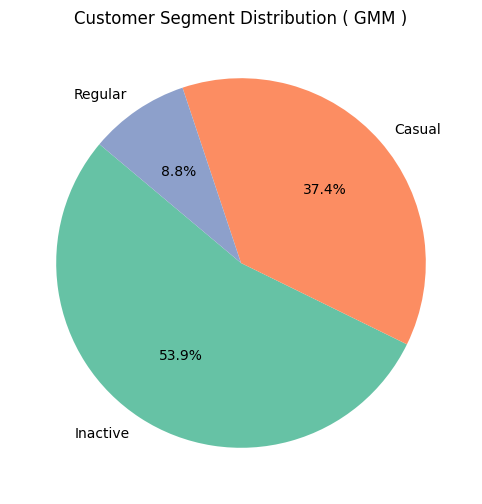

In [ ]:
# Pie Chart
X_segment_counts = amazon_data_X["cluster"].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(X_segment_counts, labels=X_segment_counts.index, autopct='%1.1f%%', startangle=140, colors=["#66c2a5", "#fc8d62", "#8da0cb"])
plt.title("Customer Segment Distribution ( GMM )")
plt.show()


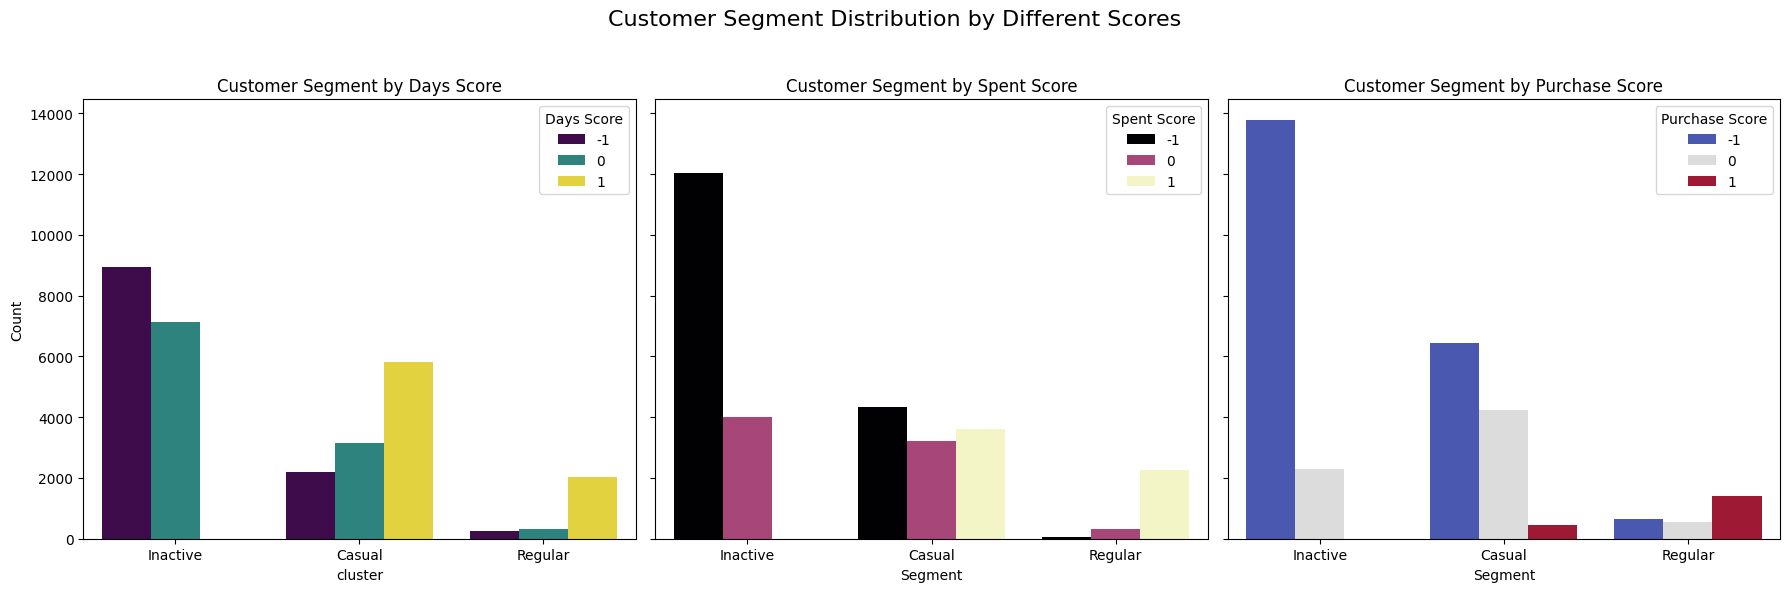

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Segment by days_score
sns.countplot(data=amazon_data_X, x='cluster', hue='days_score', palette='viridis', ax=axes[0])
axes[0].set_title("Customer Segment by Days Score")
axes[0].set_xlabel("cluster")
axes[0].set_ylabel("Count")
axes[0].legend(title="Days Score")

# Segment by spent_score
sns.countplot(data=amazon_data_X, x='cluster', hue='spent_score', palette='magma', ax=axes[1])
axes[1].set_title("Customer Segment by Spent Score")
axes[1].set_xlabel("Segment")
axes[1].legend(title="Spent Score")

# Segment by purchase_score
sns.countplot(data=amazon_data_X, x='cluster', hue='purchase_score', palette='coolwarm', ax=axes[2])
axes[2].set_title("Customer Segment by Purchase Score")
axes[2].set_xlabel("Segment")
axes[2].legend(title="Purchase Score")


plt.suptitle("Customer Segment Distribution by Different Scores", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## **ADDITIONAL PREDICTION ON RAW CLEANED DATA BY RANDOM FOREST**

**After all the segment prediction, I have decided to go with this "OWN METHOD" which implemented and distributed the segment in a efficient way ( More logically ). for prediction on Raw data**

USING SEGMENT PREDICTED DATASET TO PREDICT THE RAW DATASET, SPLITING AND TRAINING BY RANDOM FOREST

In [ ]:
#  Spliting
X = amazon_data_X[['days_last_purchase', 'total_spent', 'purchase_count']]
y = amazon_data_X['cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predicting and evaluating
y_pred = rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

In [ ]:
# Evaluation report
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))

Test Accuracy: 100.00%
              precision    recall  f1-score   support

      Casual       1.00      1.00      1.00      2201
    Inactive       1.00      1.00      1.00      3227
     Regular       1.00      1.00      1.00       536

    accuracy                           1.00      5964
   macro avg       1.00      1.00      1.00      5964
weighted avg       1.00      1.00      1.00      5964



**CREATING NEEDED FEATURES FOR ORIGINAL DATA FRAME**

In [ ]:
#  total purchase count
frequency_data = data.groupby('cust_id').size().reset_index(name='purchase_count')
data = data.merge(frequency_data, on='cust_id', how='left')

In [ ]:
# Converting datetime format
data['order_date'] = pd.to_datetime(data['order_date'], format='%d/%m/%Y', errors='coerce')

# Droping invalid dates
data = data.dropna(subset=['order_date'])

# specific date for calculation
specific_date = pd.to_datetime('2022-01-01')

# Calculating max date and counting days
recency_data = data.groupby('cust_id')['order_date'].max().reset_index()
recency_data['days_last_purchase'] = (specific_date - recency_data['order_date']).dt.days
recency_data = recency_data[['cust_id', 'days_last_purchase']]

# Merging
data = pd.merge(data, recency_data, on='cust_id', how='left')

In [ ]:
# Total spending
monetary_data = data.groupby('cust_id')['total'].sum().reset_index(name='total_spent')

# Merging
data = data.merge(monetary_data, on='cust_id', how='left')

In [ ]:
# Grouping
final_data = data.groupby('cust_id').agg({
    'full_name': 'first',
    'Gender': 'first',
    'age': 'first',
    'State': 'first',
    'purchase_count': 'first',
    'days_last_purchase': 'first',
    'total_spent': 'first',
    'payment_method': 'first',
}).reset_index()

print(final_data)

       cust_id           full_name Gender  age State  purchase_count  \
0            4     Doughty, Reggie      M   33    MO              41   
1           15     Diebold, Debbie      F   69    IN               6   
2           16  Sturtevant, Michal      M   59    SC              20   
3           20        Pulver, Eddy      M   27    MS              11   
4           21           Kan, Adam      M   34    MD               1   
...        ...                 ...    ...  ...   ...             ...   
64031   115322       Nowak, Shaina      F   56    PA               2   
64032   115323       Latham, Brady      M   51    NY               1   
64033   115324    Brunetti, Bennie      M   52    GA               1   
64034   115325   Giusti, Francesca      F   38    NC               2   
64035   115326     Schlosser, Rolf      M   28    TN               1   

       days_last_purchase  total_spent payment_method  
0                      94    74794.490           Cash  
1                     3

PREDICTING

In [ ]:
# Predicting

X_full = final_data[['days_last_purchase', 'total_spent', 'purchase_count']]
final_data['segment'] = rf_model.predict(X_full)

In [ ]:
final_data.head()

,cust_id,full_name,Gender,age,State,purchase_count,days_last_purchase,total_spent,payment_method,segment
0,4,"Doughty, Reggie",M,33,MO,41,94,74794.490,Cash,Regular
1,15,"Diebold, Debbie",F,69,IN,6,324,415.100,Cash,Inactive
2,16,"Sturtevant, Michal",M,59,SC,20,415,27975.799,Cash,Regular
3,20,"Pulver, Eddy",M,27,MS,11,94,60313.718,Cash,Regular
4,21,"Kan, Adam",M,34,MD,1,332,126.000,Cash,Inactive


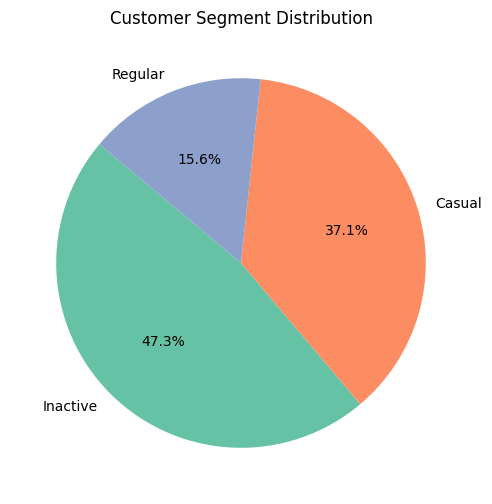

In [ ]:
#plotting pie chart for segments
segment_counts = final_data["segment"].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140, colors=["#66c2a5", "#fc8d62", "#8da0cb"])
plt.title("Customer Segment Distribution")
plt.show()


**CONCLUSION**

BY PREDICTING THE CUSTOMER BUYING SEGMENTATION, WE CAN IMPROVE THE BUSINESS IN VARIOUS WAY

* Regular Customers: Provide loyalty rewards such as gifts
* Casual Customers: Offer targeted promotions and discounts
* Inactive Customers: Use advertising and campaigns

In [ ]:
# from google.colab import files

# # Save the file to CSV
# final_data.to_csv('final_data.csv', index=False)

# # Download
# files.download('final_data.csv')